## **DATASET**: Pima Indians Diabetes Dataset

El conjunto de datos Pima Indians Diabetes proviene de un estudio médico realizado en mujeres adultas de la tribu indígena Pima, una población con alta incidencia de diabetes tipo 2. Este dataset contiene información clínica y biométrica que permite predecir si una persona presenta diabetes.

**Características del Dataset:**
- **Pregnancies**: Número de embarazos
- **Glucose**: Concentración de glucosa en plasma (mg/dL) después de 2 horas en una prueba oral de tolerancia a la glucosa
- **BloodPressure**: Presión arterial diastólica (mm Hg)
- **SkinThickness**: Grosor del pliegue cutáneo del tríceps (mm)
- **Insulin**: Nivel de insulina sérica de 2 horas (mu U/ml)
- **BMI**: Índice de masa corporal (peso en kg/(altura en m)²)
- **DiabetesPedigreeFunction**: Función que representa la historia familiar de diabetes
- **Age**: Edad en años
- **Outcome**: Variable objetivo (0 = No diabética, 1 = Diabética)

**Problema a resolver:** Clasificación binaria para determinar si una paciente tiene diabetes tipo 2 basándose en las mediciones clínicas y biométricas.

**Desafío importante:** El dataset contiene valores cero que fueron utilizados erróneamente para representar datos faltantes en algunas variables donde biológicamente no puede haber ceros (como presión arterial, glucosa, BMI, etc.). Esto requiere un proceso de limpieza y preprocesamiento cuidadoso.

## **Análisis Exploratorio de Datos (EDA)**

El Análisis Exploratorio de Datos es un enfoque crucial en Machine Learning que nos permite entender la estructura, patrones y características de nuestros datos antes de construir modelos predictivos. En el contexto médico, el EDA nos ayuda a:

### Objetivos del EDA
1. **Comprensión de los datos**: Entender la distribución de cada variable clínica y su relación con la diabetes
2. **Detección de anomalías**: Identificar valores atípicos o inconsistencias que puedan afectar nuestro modelo
3. **Identificación de patrones**: Descubrir relaciones entre variables que nos ayuden a comprender mejor la enfermedad
4. **Preparación para modelado**: Detectar problemas de calidad de datos que necesiten tratamiento especial

### Importancia en Salud
En el ámbito médico, un EDA exhaustivo es fundamental porque:
- Los datos clínicos pueden tener errores de medición o registro
- Las variables biométricas están interrelacionadas (ej. BMI y presión arterial)
- La detección temprana de problemas en los datos puede prevenir diagnósticos erróneos
- Nos permite identificar qué factores son más relevantes para la predicción de diabetes

**Si desea profundizar más sobre EDA, le invito a leer:** https://www.ibm.com/topics/exploratory-data-analysis

# **1. Importar Librerías y Dataset**

In [1]:
# Importar librerías fundamentales para análisis de datos
import pandas as pd  # Manipulación y análisis de datos estructurados
import numpy as np   # Operaciones numéricas y manejo de arrays

# Librerías para visualización de datos
import matplotlib.pyplot as plt  # Creación de gráficos estáticos
import seaborn as sns           # Visualizaciones estadísticas atractivas

# Configuración de estilo y advertencias
import warnings
warnings.filterwarnings("ignore")  # Suprime advertencias para una salida más limpia

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')  # Estilo visual profesional
sns.set_palette("husl")  # Paleta de colores atractiva

# Configuración para mostrar todas las columnas en pandas
pd.set_option('display.max_columns', None)

print("✓ Librerías importadas exitosamente")

✓ Librerías importadas exitosamente


In [2]:
# Importar el dataset de diabetes
diabetes_df = pd.read_csv("C:/Users/Mazapan/Documents/Utt/BDFlorencio/Exámen2Parcial/diabetes.csv")

print("✓ Dataset cargado exitosamente")
print(f"Dimensiones del dataset: {diabetes_df.shape[0]} filas x {diabetes_df.shape[1]} columnas")

✓ Dataset cargado exitosamente
Dimensiones del dataset: 768 filas x 9 columnas


# **2. Exploración Inicial de los Datos**

In [3]:
# Visualizar las primeras filas del dataset para entender su estructura
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# Información general del dataset: tipos de datos, valores no nulos, memoria utilizada
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Verificar las dimensiones exactas del dataset
print(f"Número total de pacientes (filas): {diabetes_df.shape[0]}")
print(f"Número total de características (columnas): {diabetes_df.shape[1]}")
print(f"\nNombres de las columnas:")
print(diabetes_df.columns.tolist())

Número total de pacientes (filas): 768
Número total de características (columnas): 9

Nombres de las columnas:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


# **3. Descripción Estadística de las Características**

In [6]:
# Estadísticas descriptivas completas: media, desviación estándar, percentiles, min, max
# Esto nos ayuda a entender la distribución y rango de cada variable clínica
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Análisis más detallado con percentiles adicionales para mejor comprensión de la distribución
diabetes_df.describe(percentiles=[.01, .05, .10, .25, .50, .75, .90, .95, .99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
1%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.094680,21.000000,0.000000
5%,0.000000,79.000000,38.700000,0.000000,0.000000,21.800000,0.140350,21.000000,0.000000
10%,0.000000,85.000000,54.000000,0.000000,0.000000,23.600000,0.165000,22.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000


=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (OUTCOME) ===

Conteo de casos:
Outcome
0    500
1    268
Name: count, dtype: int64

Porcentajes:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


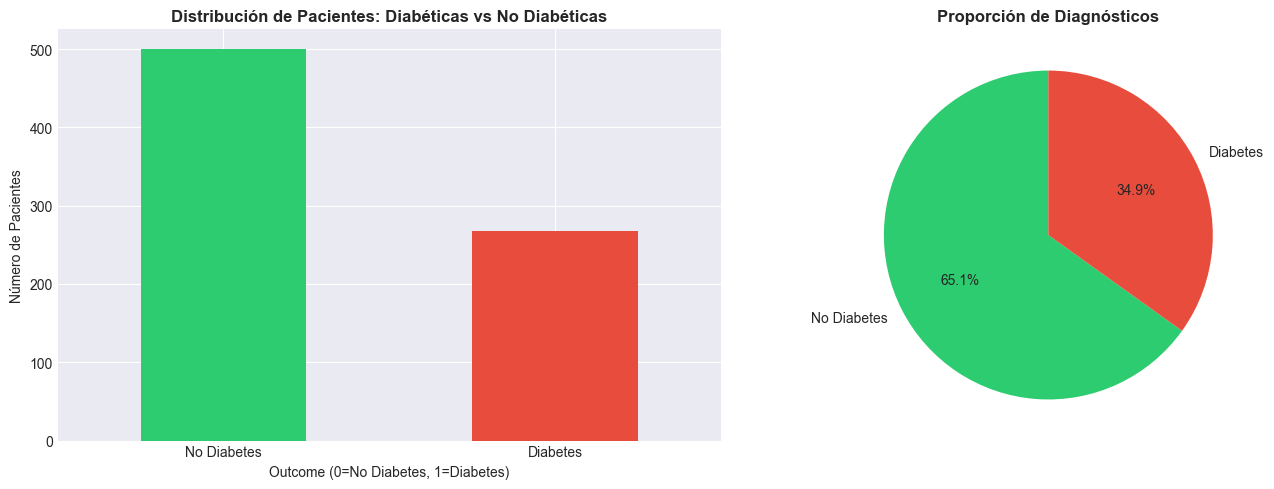

In [7]:
# Análisis de la variable objetivo (Outcome)
print("=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (OUTCOME) ===")
print("\nConteo de casos:")
print(diabetes_df['Outcome'].value_counts())
print("\nPorcentajes:")
print(diabetes_df['Outcome'].value_counts(normalize=True) * 100)

# Visualización de la distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de conteo
diabetes_df['Outcome'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribución de Pacientes: Diabéticas vs No Diabéticas', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Outcome (0=No Diabetes, 1=Diabetes)', fontsize=10)
axes[0].set_ylabel('Número de Pacientes', fontsize=10)
axes[0].set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)

# Gráfico de pastel
outcome_counts = diabetes_df['Outcome'].value_counts()
axes[1].pie(outcome_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', 
            colors=['#2ecc71', '#e74c3c'], startangle=90, textprops={'fontsize': 10})
axes[1].set_title('Proporción de Diagnósticos', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### **Interpretación de Estadísticas**

Al observar las estadísticas descriptivas, podemos notar varios puntos importantes:

1. **Valores cero anómalos**: Algunas variables como Glucose, BloodPressure, SkinThickness, Insulin y BMI tienen valores mínimos de 0, lo cual es biológicamente imposible. Estos ceros representan datos faltantes que fueron codificados incorrectamente.

2. **Desbalance de clases**: La variable Outcome muestra que aproximadamente el 65% de las pacientes no tienen diabetes y el 35% sí la tienen. Esto indica un ligero desbalance que debemos considerar en el modelado.

3. **Variabilidad en las mediciones**: Variables como Insulin muestran alta variabilidad (desviación estándar alta), lo que sugiere diferencias significativas entre pacientes.

# **4. Detección y Visualización de Valores Faltantes**

In [8]:
# Verificar valores nulos explícitos (NaN, None)
print("=== VALORES NULOS EXPLÍCITOS ===")
print(diabetes_df.isnull().sum())
print(f"\nTotal de valores nulos en el dataset: {diabetes_df.isnull().sum().sum()}")

=== VALORES NULOS EXPLÍCITOS ===
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Total de valores nulos en el dataset: 0


In [9]:
# IMPORTANTE: Detectar valores cero que representan datos faltantes
# En el contexto médico, es imposible tener 0 en: Glucosa, Presión Arterial, Grosor de Piel, Insulina, BMI

# Columnas donde el cero NO tiene sentido biológico
columnas_con_ceros_invalidos = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("=== DETECCIÓN DE VALORES CERO (DATOS FALTANTES OCULTOS) ===")
print("\nColumnas con valores cero biológicamente imposibles:\n")

for columna in columnas_con_ceros_invalidos:
    num_ceros = (diabetes_df[columna] == 0).sum()
    porcentaje = (num_ceros / len(diabetes_df)) * 100
    print(f"{columna:20} -> {num_ceros:3} ceros ({porcentaje:5.2f}%)")

# Calcular total de valores problemáticos
total_ceros = sum((diabetes_df[col] == 0).sum() for col in columnas_con_ceros_invalidos)
print(f"\nTotal de valores cero problemáticos: {total_ceros}")

=== DETECCIÓN DE VALORES CERO (DATOS FALTANTES OCULTOS) ===

Columnas con valores cero biológicamente imposibles:

Glucose              ->   5 ceros ( 0.65%)
BloodPressure        ->  35 ceros ( 4.56%)
SkinThickness        -> 227 ceros (29.56%)
Insulin              -> 374 ceros (48.70%)
BMI                  ->  11 ceros ( 1.43%)

Total de valores cero problemáticos: 652


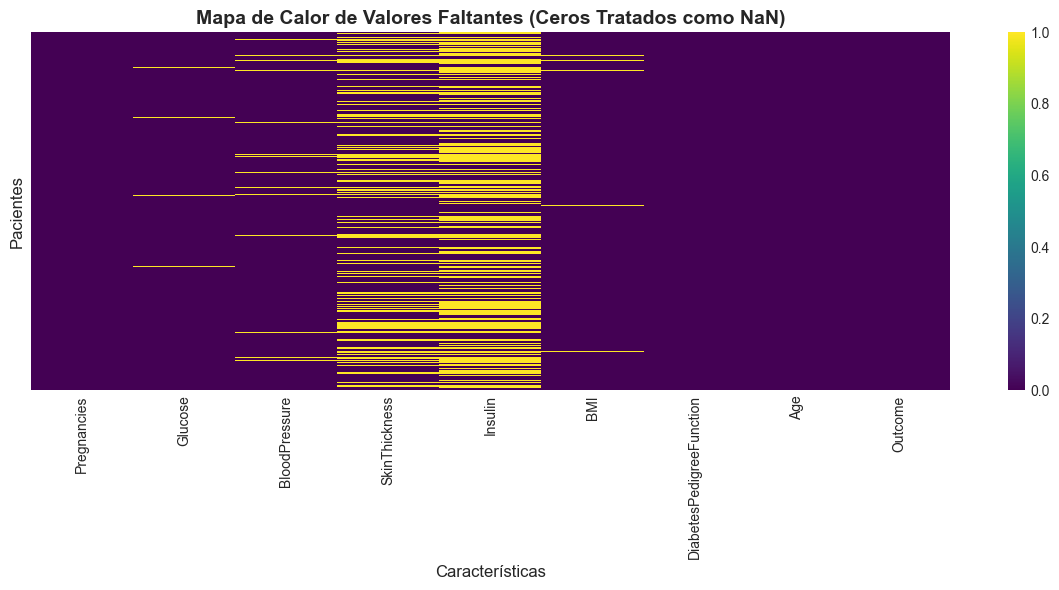

In [10]:
# Crear una copia del dataframe marcando los ceros como NaN para visualización
diabetes_missing = diabetes_df.copy()

# Reemplazar ceros por NaN solo en las columnas donde no tiene sentido biológico
for columna in columnas_con_ceros_invalidos:
    diabetes_missing[columna] = diabetes_missing[columna].replace(0, np.nan)

# Visualizar valores faltantes con un mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(diabetes_missing.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Mapa de Calor de Valores Faltantes (Ceros Tratados como NaN)', fontsize=14, fontweight='bold')
plt.xlabel('Características', fontsize=12)
plt.ylabel('Pacientes', fontsize=12)
plt.tight_layout()
plt.show()

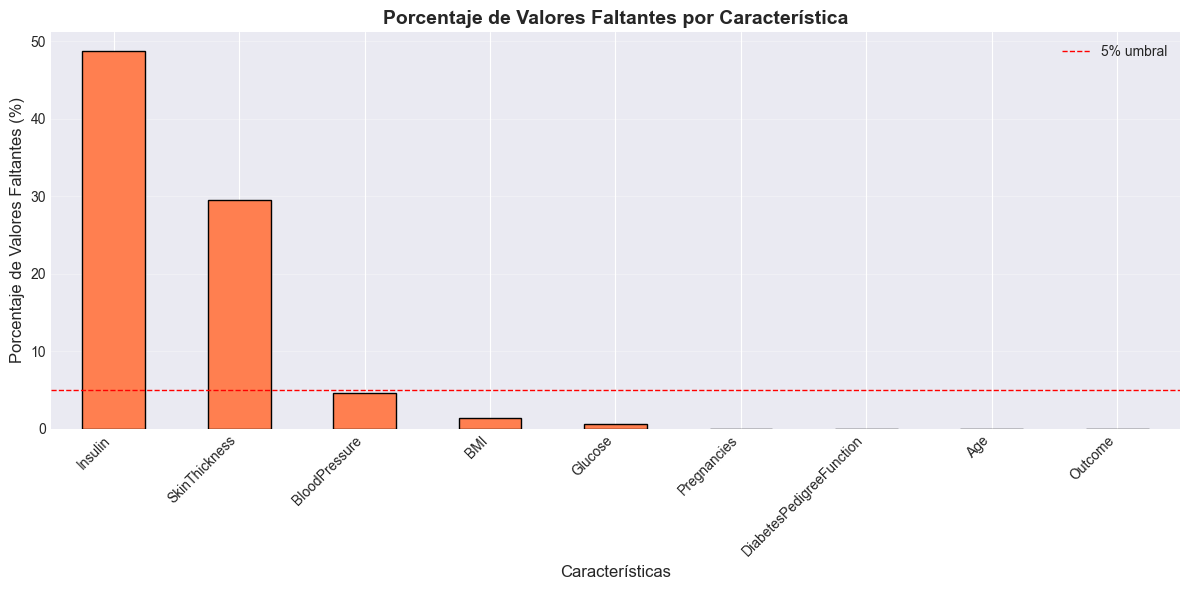

In [11]:
# Gráfico de barras mostrando el porcentaje de valores faltantes por variable
missing_percentages = (diabetes_missing.isnull().sum() / len(diabetes_missing)) * 100
missing_percentages = missing_percentages.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
missing_percentages.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Porcentaje de Valores Faltantes por Característica', fontsize=14, fontweight='bold')
plt.xlabel('Características', fontsize=12)
plt.ylabel('Porcentaje de Valores Faltantes (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Añadir línea de referencia en 5%
plt.axhline(y=5, color='red', linestyle='--', linewidth=1, label='5% umbral')
plt.legend()

plt.tight_layout()
plt.show()

### **Análisis de Valores Faltantes**

**Hallazgos importantes:**

1. **Insulin**: Aproximadamente 49% de valores cero (datos faltantes) - La variable más afectada
2. **SkinThickness**: Aproximadamente 30% de valores cero
3. **BloodPressure**: Aproximadamente 5% de valores cero
4. **BMI**: Aproximadamente 1% de valores cero
5. **Glucose**: Aproximadamente 1% de valores cero

**Implicaciones:**
- Necesitamos una estrategia de imputación cuidadosa para estos valores
- La alta cantidad de valores faltantes en Insulin puede afectar su utilidad predictiva
- Debemos considerar si eliminar filas, imputar valores, o crear variables indicadoras de valores faltantes

# **5. Análisis de Distribución de Características Numéricas**

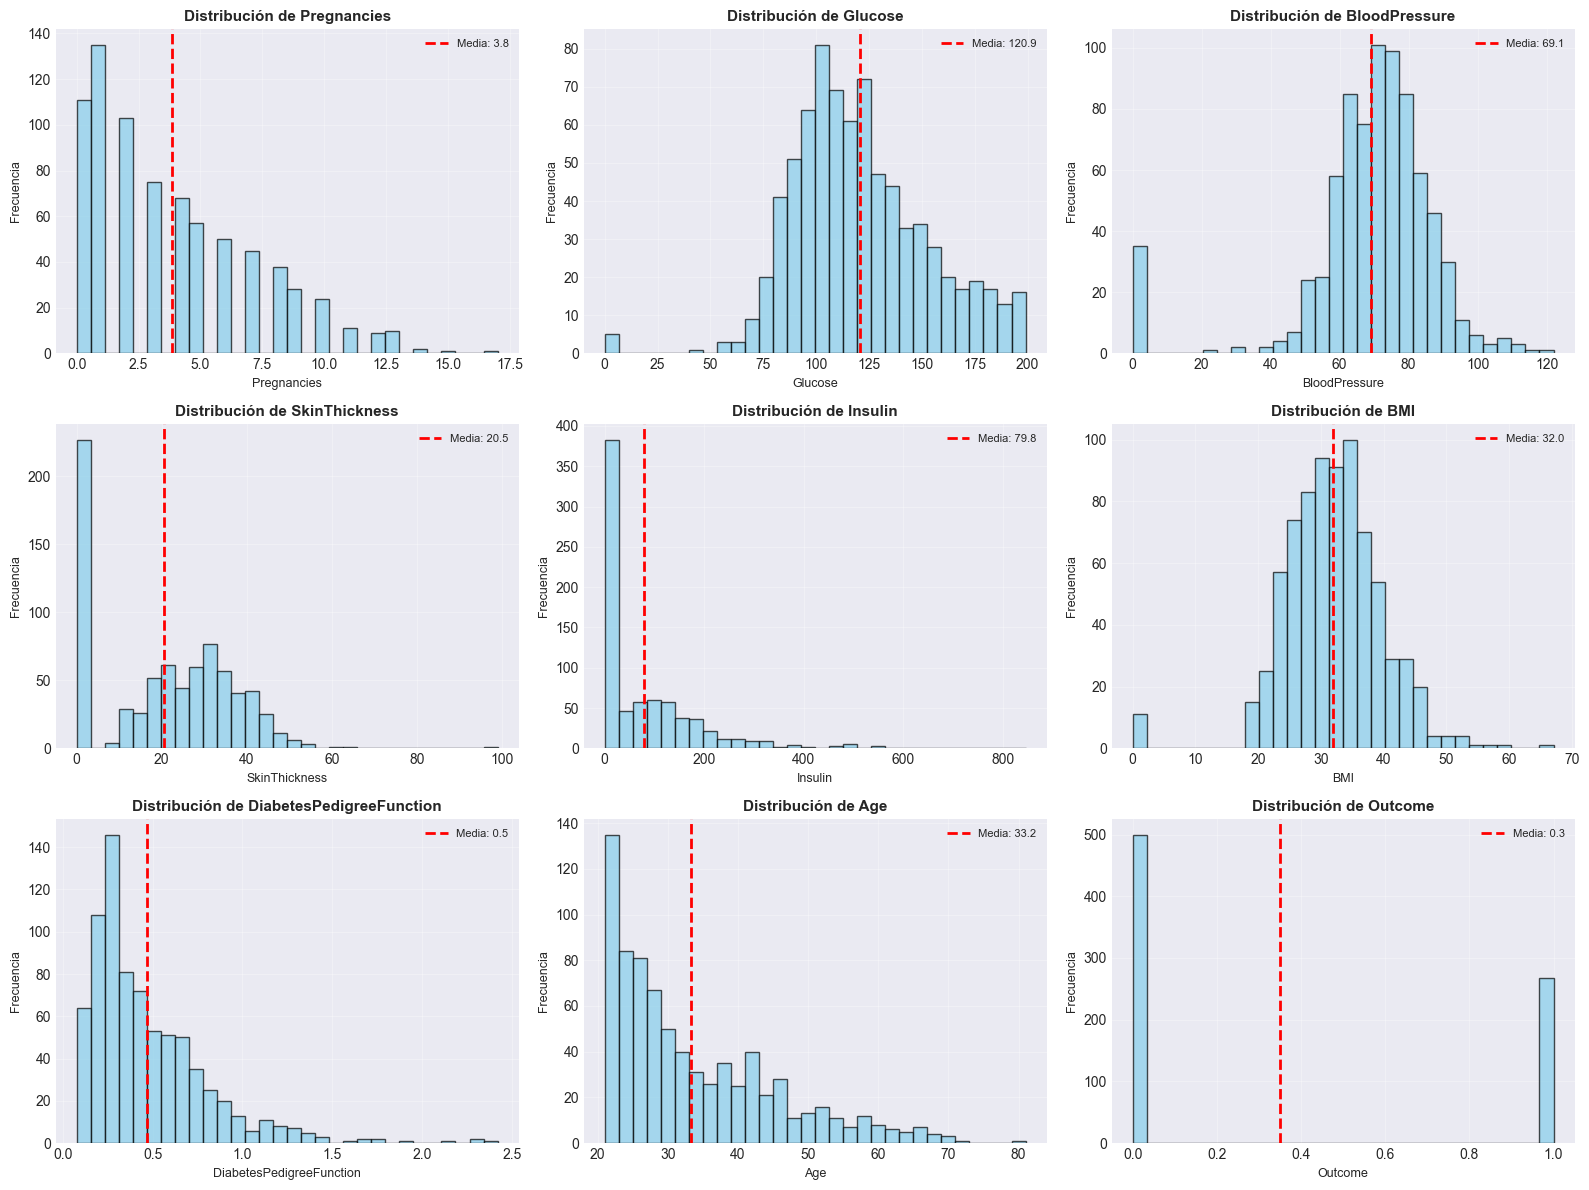

In [12]:
# Histogramas de todas las características numéricas
# Esto nos ayuda a visualizar la forma de distribución de cada variable

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()  # Aplanar el array de ejes para facilitar la iteración

columnas = diabetes_df.columns

for idx, columna in enumerate(columnas):
    axes[idx].hist(diabetes_df[columna], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribución de {columna}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(columna, fontsize=9)
    axes[idx].set_ylabel('Frecuencia', fontsize=9)
    axes[idx].grid(alpha=0.3)
    
    # Añadir línea vertical en la media
    mean_val = diabetes_df[columna].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.1f}')
    axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.show()

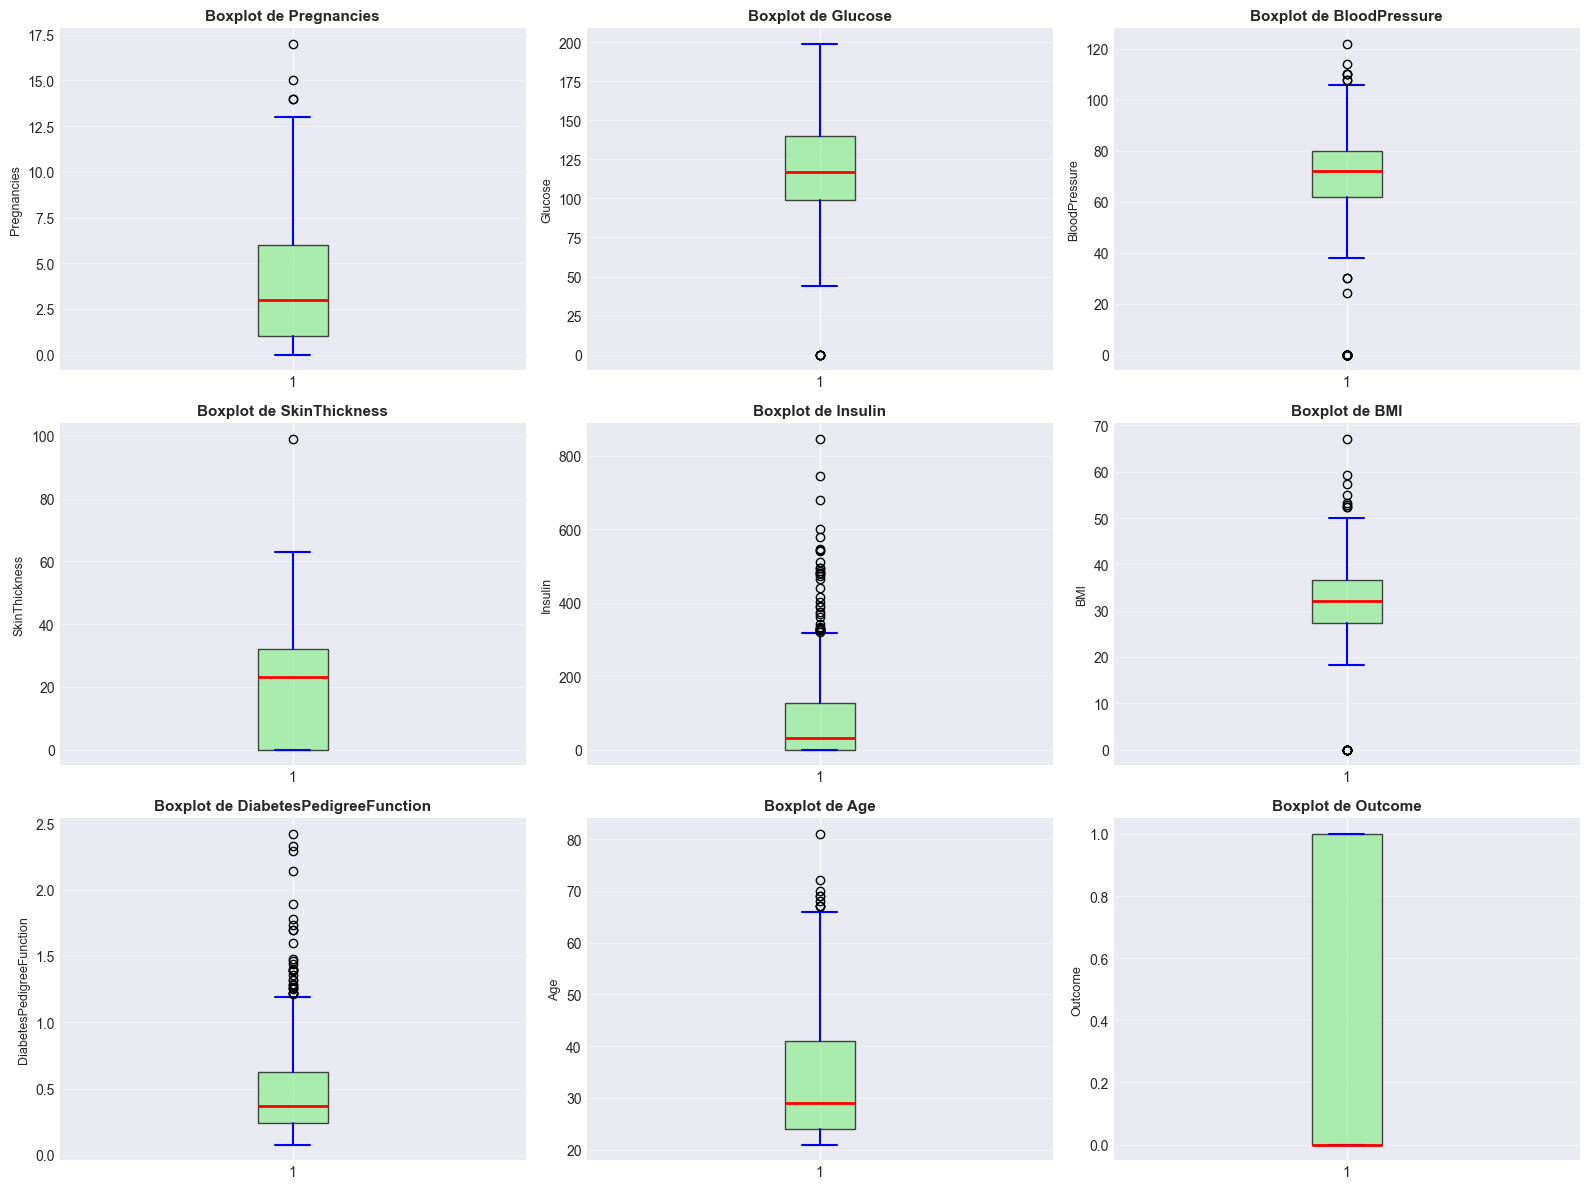

In [14]:
# Boxplots para detectar valores atípicos (outliers)
# Los boxplots muestran la mediana, cuartiles y valores extremos

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, columna in enumerate(columnas):
    axes[idx].boxplot(diabetes_df[columna], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightgreen', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2),
                      whiskerprops=dict(color='blue', linewidth=1.5),
                      capprops=dict(color='blue', linewidth=1.5))
    axes[idx].set_title(f'Boxplot de {columna}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(columna, fontsize=9)
    axes[idx].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

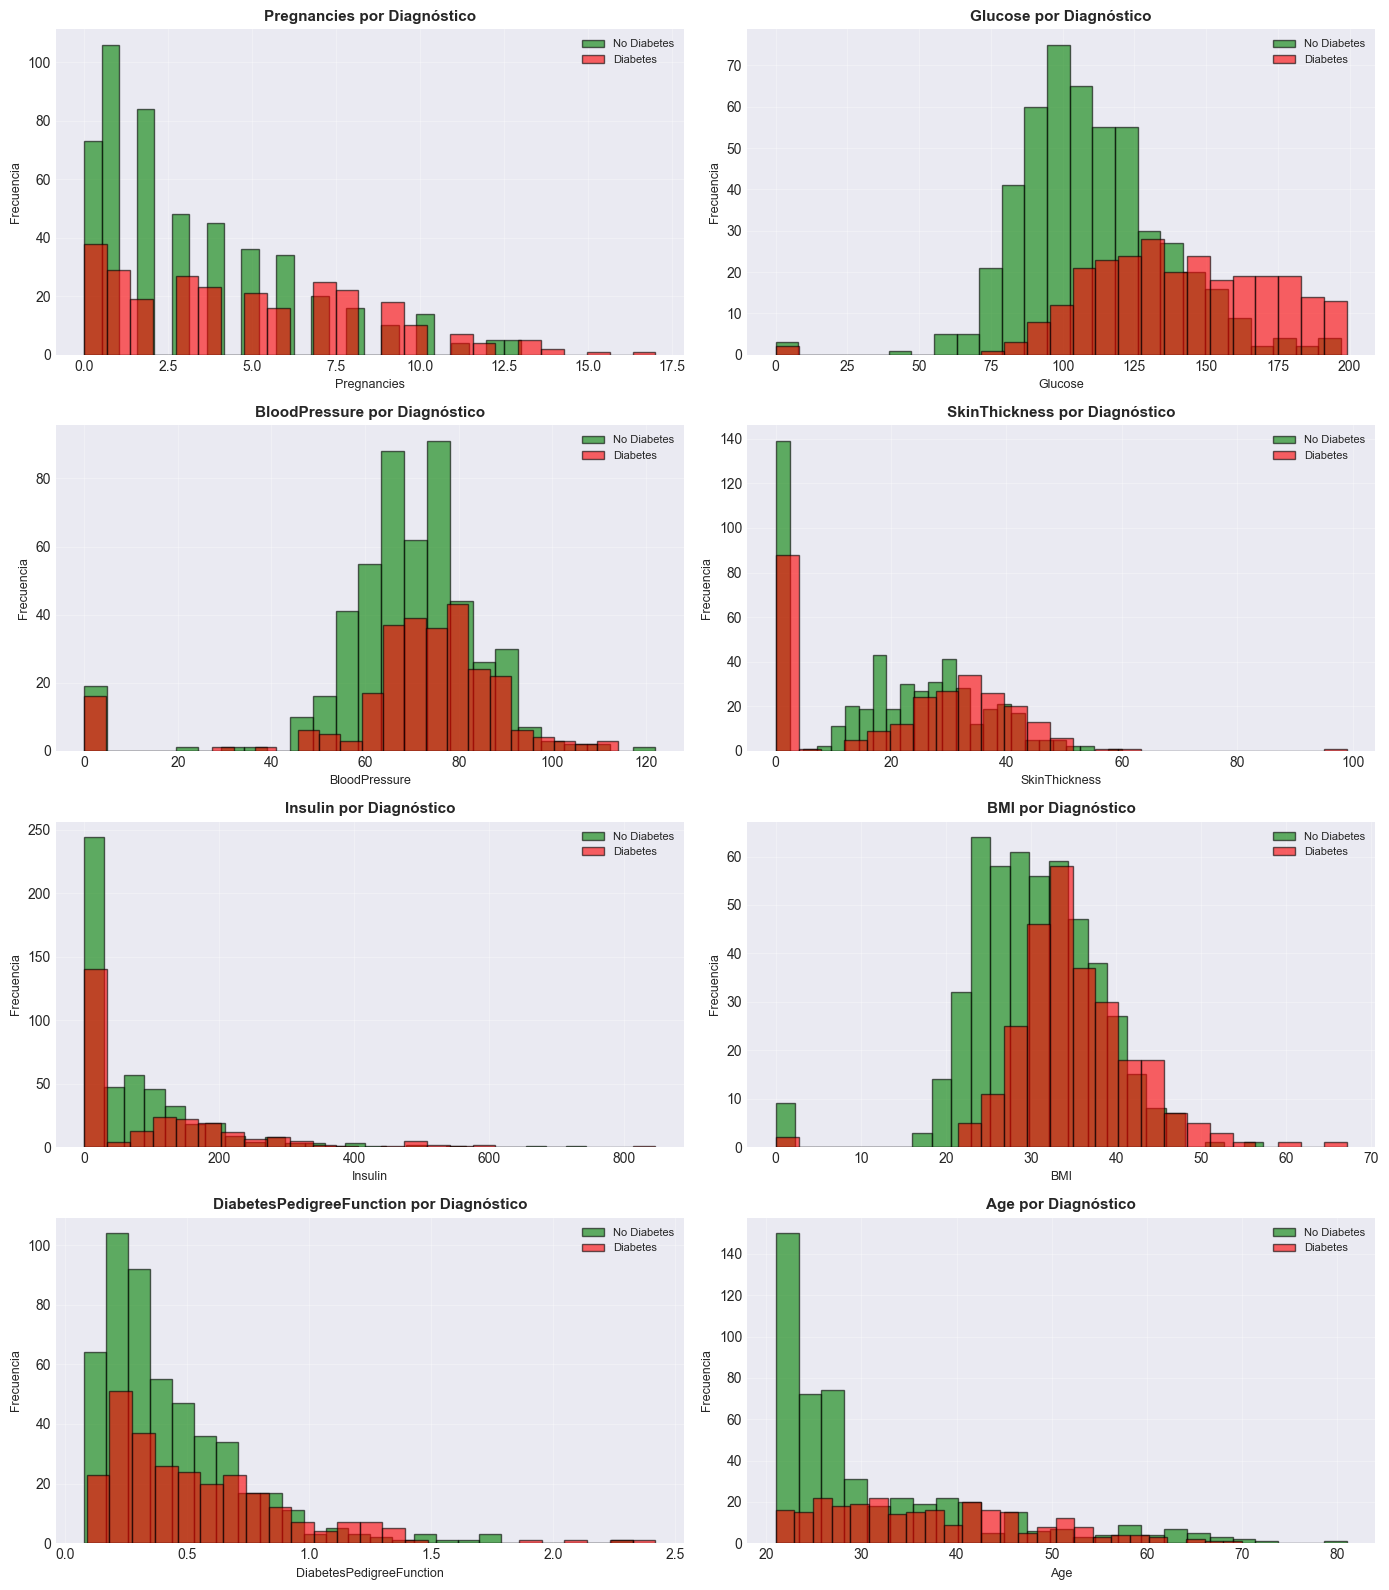

In [13]:
# Análisis comparativo: Distribución de variables por Outcome (Diabética vs No Diabética)
# Esto nos ayuda a ver si hay diferencias significativas entre grupos

# Seleccionar variables numéricas (excluyendo Outcome)
variables_numericas = [col for col in diabetes_df.columns if col != 'Outcome']

fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.ravel()

for idx, columna in enumerate(variables_numericas):
    # Separar datos por outcome
    no_diabetes = diabetes_df[diabetes_df['Outcome'] == 0][columna]
    diabetes = diabetes_df[diabetes_df['Outcome'] == 1][columna]
    
    # Crear histogramas superpuestos
    axes[idx].hist(no_diabetes, bins=25, alpha=0.6, label='No Diabetes', color='green', edgecolor='black')
    axes[idx].hist(diabetes, bins=25, alpha=0.6, label='Diabetes', color='red', edgecolor='black')
    
    axes[idx].set_title(f'{columna} por Diagnóstico', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(columna, fontsize=9)
    axes[idx].set_ylabel('Frecuencia', fontsize=9)
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

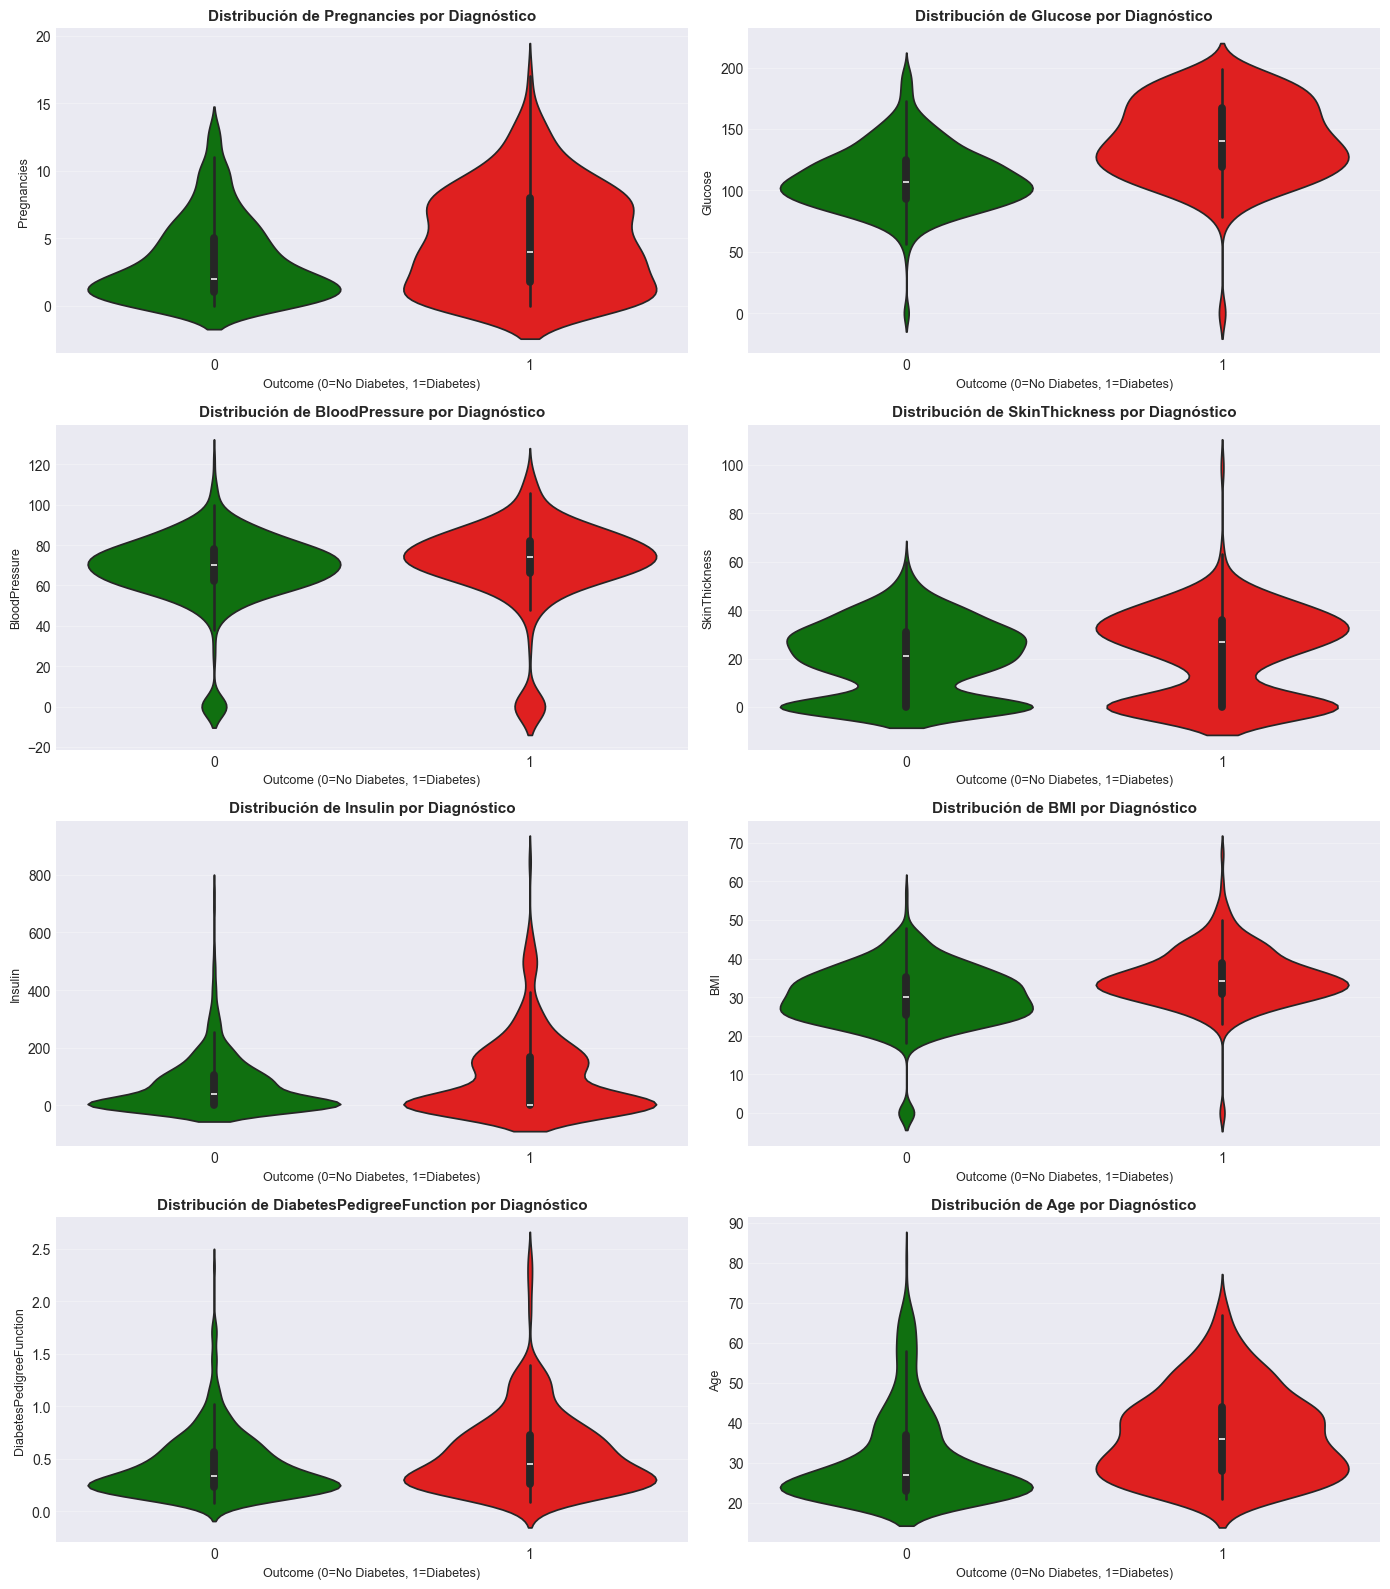

In [16]:
# Violin plots para una visualización más rica de las distribuciones comparativas

fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.ravel()

for idx, columna in enumerate(variables_numericas):
    sns.violinplot(data=diabetes_df, x='Outcome', y=columna, ax=axes[idx], palette=['green', 'red'])
    axes[idx].set_title(f'Distribución de {columna} por Diagnóstico', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Outcome (0=No Diabetes, 1=Diabetes)', fontsize=9)
    axes[idx].set_ylabel(columna, fontsize=9)
    axes[idx].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### **Interpretación de Distribuciones**

**Observaciones clave:**

1. **Glucose (Glucosa)**: Las pacientes con diabetes muestran niveles de glucosa significativamente más altos, con la distribución desplazada hacia la derecha. Esta es probablemente una de las variables más predictivas.

2. **BMI (Índice de Masa Corporal)**: Las pacientes diabéticas tienden a tener un BMI más alto, confirmando la relación conocida entre obesidad y diabetes.

3. **Age (Edad)**: La diabetes es más prevalente en pacientes de mayor edad, como se observa en la distribución.

4. **Pregnancies (Embarazos)**: Mayor número de embarazos parece estar asociado con mayor riesgo de diabetes.

5. **DiabetesPedigreeFunction**: Esta variable muestra cierta separación entre grupos, indicando que la historia familiar es relevante.

6. **Valores atípicos**: Se observan outliers en varias variables, especialmente en Insulin, que deberemos manejar cuidadosamente.

# **6. Análisis de Correlaciones**

In [14]:
# Calcular la matriz de correlación
# La correlación mide la relación lineal entre variables (valores entre -1 y 1)
correlation_matrix = diabetes_df.corr()

# Mostrar la matriz de correlación
print("=== MATRIZ DE CORRELACIÓN ===")
print(correlation_matrix.round(3))

=== MATRIZ DE CORRELACIÓN ===
                          Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                     1.000    0.129          0.141         -0.082   
Glucose                         0.129    1.000          0.153          0.057   
BloodPressure                   0.141    0.153          1.000          0.207   
SkinThickness                  -0.082    0.057          0.207          1.000   
Insulin                        -0.074    0.331          0.089          0.437   
BMI                             0.018    0.221          0.282          0.393   
DiabetesPedigreeFunction       -0.034    0.137          0.041          0.184   
Age                             0.544    0.264          0.240         -0.114   
Outcome                         0.222    0.467          0.065          0.075   

                          Insulin    BMI  DiabetesPedigreeFunction    Age  \
Pregnancies                -0.074  0.018                    -0.034  0.544   
Glucose        

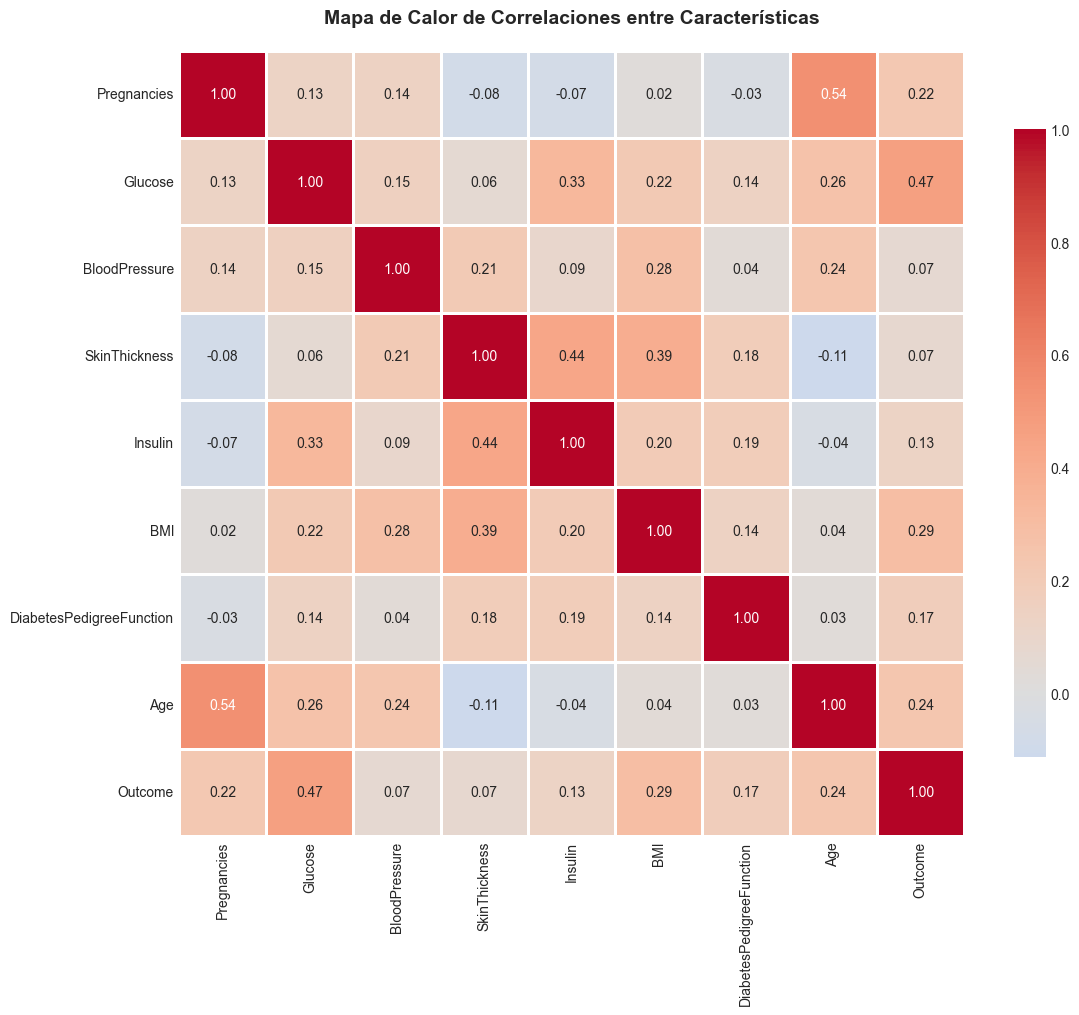

In [15]:
# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Mapa de Calor de Correlaciones entre Características', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

=== CORRELACIONES CON OUTCOME (DIABETES) ===

Variables ordenadas por correlación con Diabetes:

Glucose                        ->  0.467
BMI                            ->  0.293
Age                            ->  0.238
Pregnancies                    ->  0.222
DiabetesPedigreeFunction       ->  0.174
Insulin                        ->  0.131
SkinThickness                  ->  0.075
BloodPressure                  ->  0.065


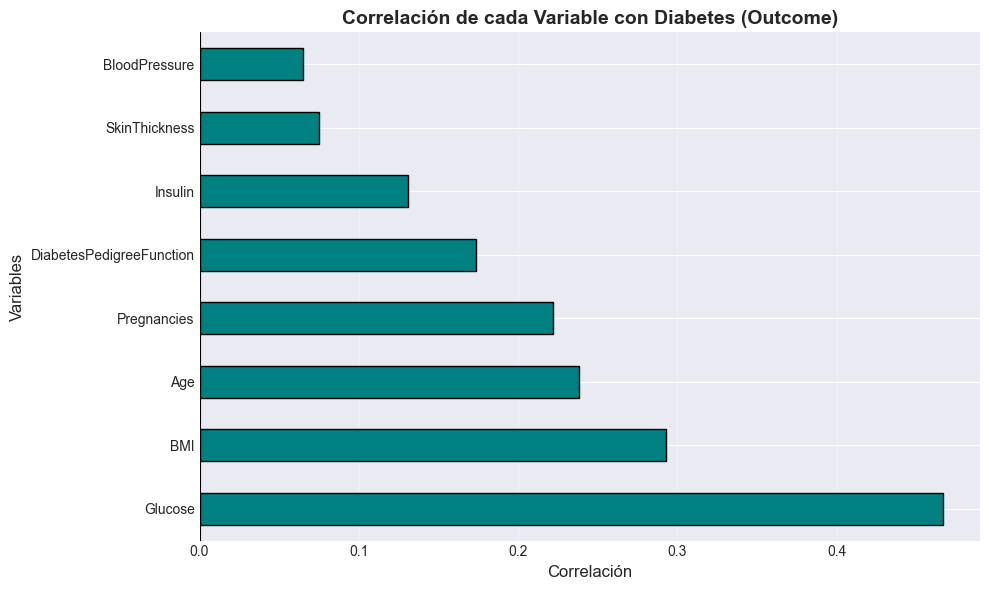

In [16]:
# Correlaciones con la variable objetivo (Outcome) ordenadas
correlaciones_outcome = correlation_matrix['Outcome'].sort_values(ascending=False)

print("=== CORRELACIONES CON OUTCOME (DIABETES) ===")
print("\nVariables ordenadas por correlación con Diabetes:\n")
for variable, corr in correlaciones_outcome.items():
    if variable != 'Outcome':
        print(f"{variable:30} -> {corr:6.3f}")

# Visualizar las correlaciones con Outcome
plt.figure(figsize=(10, 6))
correlaciones_outcome[correlaciones_outcome.index != 'Outcome'].plot(kind='barh', color='teal', edgecolor='black')
plt.title('Correlación de cada Variable con Diabetes (Outcome)', fontsize=14, fontweight='bold')
plt.xlabel('Correlación', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.grid(alpha=0.3, axis='x')
plt.axvline(x=0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

Variables seleccionadas para scatter plot matrix: ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']


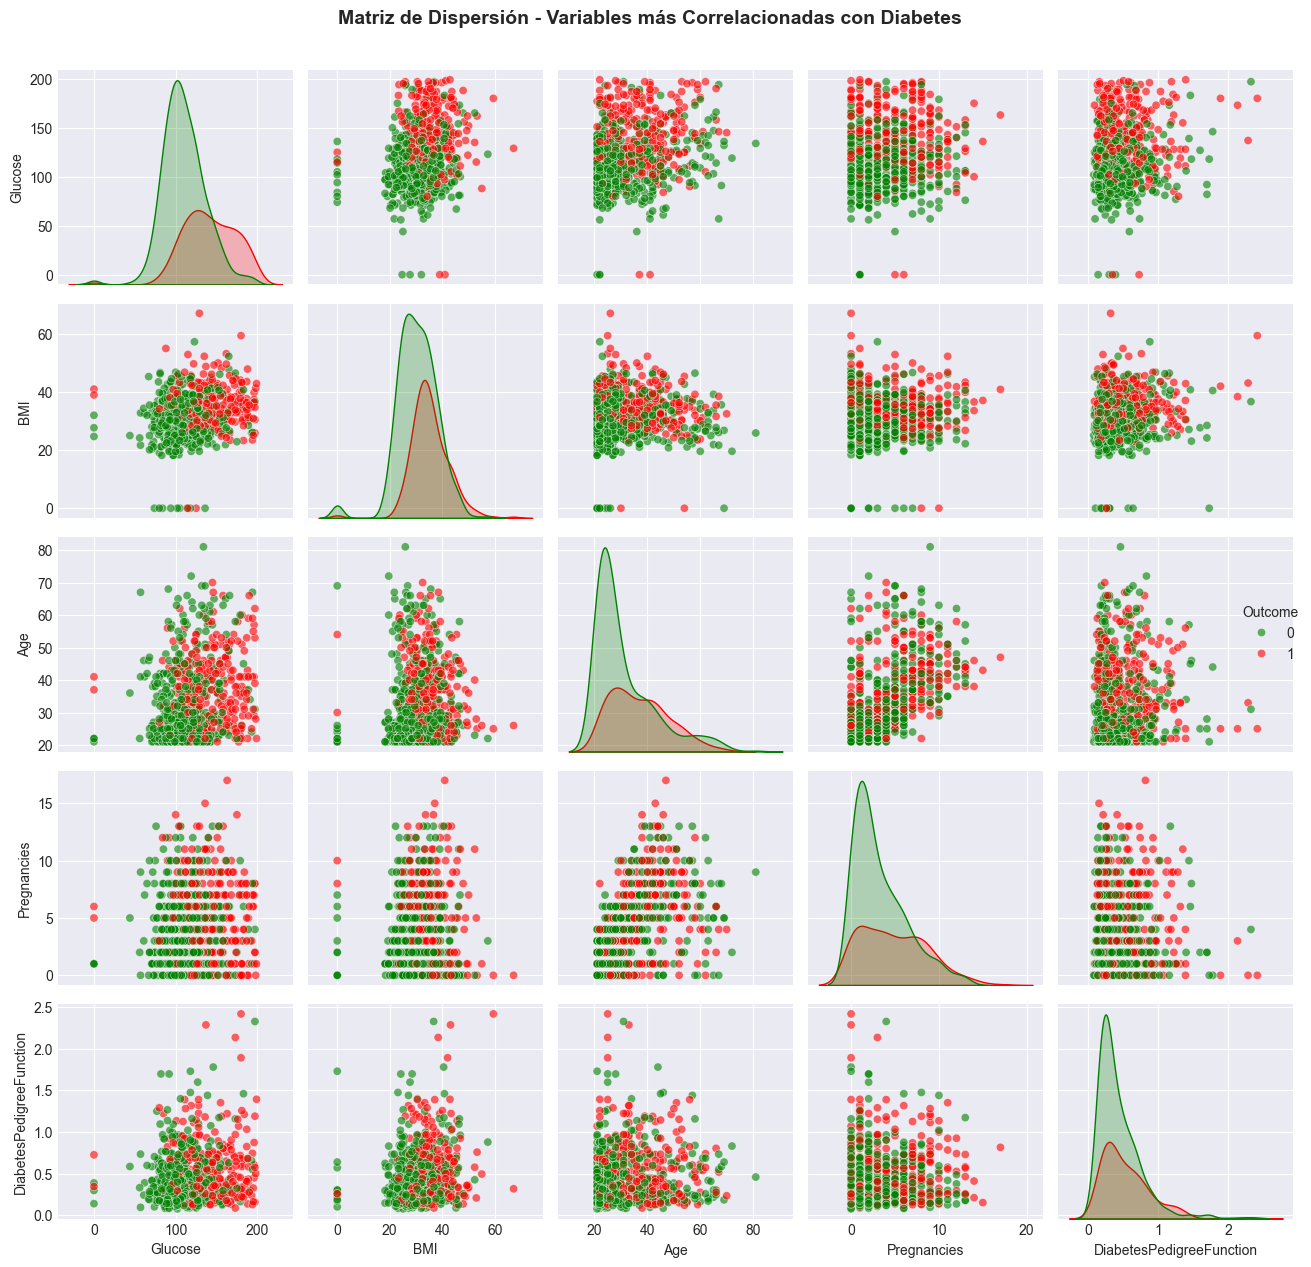

In [17]:
# Análisis de pares de variables con scatter plots (matriz de dispersión)
# Seleccionamos las 5 variables más correlacionadas con Outcome para no saturar la visualización

top_features = correlaciones_outcome[1:6].index.tolist()  # Top 5 excluyendo Outcome
top_features.append('Outcome')  # Añadir Outcome para colorear

print(f"Variables seleccionadas para scatter plot matrix: {top_features[:-1]}")

# Crear pairplot
sns.pairplot(diabetes_df[top_features], hue='Outcome', palette={0: 'green', 1: 'red'}, 
             diag_kind='kde', plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Matriz de Dispersión - Variables más Correlacionadas con Diabetes', 
             y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### **Interpretación de Correlaciones**

**Variables más correlacionadas con Diabetes (Outcome):**

1. **Glucose** (~0.47): La correlación más fuerte. A mayor nivel de glucosa, mayor probabilidad de diabetes.

2. **BMI** (~0.29): Segunda correlación más alta. El índice de masa corporal elevado es un factor de riesgo importante.

3. **Age** (~0.24): La edad muestra una correlación positiva moderada, confirmando que el riesgo aumenta con la edad.

4. **Pregnancies** (~0.22): El número de embarazos también muestra correlación positiva con diabetes.

5. **Insulin** (~0.13): Correlación más débil, posiblemente afectada por la gran cantidad de valores faltantes.

**Correlaciones entre variables predictoras:**

- **Age y Pregnancies** (~0.54): Las mujeres mayores tienden a tener más embarazos (lógico).
- **SkinThickness e Insulin** (~0.44): Relación moderada entre estas mediciones.
- **BMI y SkinThickness** (~0.39): El grosor de la piel está relacionado con el BMI.

**Implicación para el modelo:**
- No hay correlaciones extremadamente altas entre predictores (>0.8), lo que sugiere que no hay multicolinealidad severa.
- Todas las variables aportan información relativamente única al modelo.

# **7. Resumen del Análisis Exploratorio**

In [18]:
print("="*80)
print(" "*20 + "RESUMEN DEL ANÁLISIS EXPLORATORIO")
print("="*80)

print("\n CARACTERÍSTICAS DEL DATASET:")
print(f"   • Total de pacientes: {diabetes_df.shape[0]}")
print(f"   • Número de variables: {diabetes_df.shape[1]}")
print(f"   • Pacientes con diabetes: {(diabetes_df['Outcome'] == 1).sum()} ({(diabetes_df['Outcome'] == 1).sum()/len(diabetes_df)*100:.1f}%)")
print(f"   • Pacientes sin diabetes: {(diabetes_df['Outcome'] == 0).sum()} ({(diabetes_df['Outcome'] == 0).sum()/len(diabetes_df)*100:.1f}%)")

print("\n PROBLEMAS DE CALIDAD DE DATOS IDENTIFICADOS:")
print(f"   • Valores cero en Insulin: {(diabetes_df['Insulin'] == 0).sum()} ({(diabetes_df['Insulin'] == 0).sum()/len(diabetes_df)*100:.1f}%)")
print(f"   • Valores cero en SkinThickness: {(diabetes_df['SkinThickness'] == 0).sum()} ({(diabetes_df['SkinThickness'] == 0).sum()/len(diabetes_df)*100:.1f}%)")
print(f"   • Valores cero en BloodPressure: {(diabetes_df['BloodPressure'] == 0).sum()} ({(diabetes_df['BloodPressure'] == 0).sum()/len(diabetes_df)*100:.1f}%)")
print(f"   • Valores cero en BMI: {(diabetes_df['BMI'] == 0).sum()} ({(diabetes_df['BMI'] == 0).sum()/len(diabetes_df)*100:.1f}%)")
print(f"   • Valores cero en Glucose: {(diabetes_df['Glucose'] == 0).sum()} ({(diabetes_df['Glucose'] == 0).sum()/len(diabetes_df)*100:.1f}%)")

print("\n VARIABLES MÁS PREDICTIVAS (por correlación con Outcome):")
top_corr = correlaciones_outcome[1:6]
for i, (var, corr) in enumerate(top_corr.items(), 1):
    print(f"   {i}. {var:25} (r = {corr:.3f})")

print("\n HALLAZGOS PRINCIPALES:")
print("   • La glucosa es el predictor más fuerte de diabetes")
print("   • El BMI y la edad son factores de riesgo importantes")
print("   • Existe un ligero desbalance de clases (65% No Diabetes, 35% Diabetes)")
print("   • Múltiples variables tienen valores faltantes codificados como cero")
print("   • Se detectaron outliers en varias variables, especialmente en Insulin")

print("\n" + "="*80)

                    RESUMEN DEL ANÁLISIS EXPLORATORIO

 CARACTERÍSTICAS DEL DATASET:
   • Total de pacientes: 768
   • Número de variables: 9
   • Pacientes con diabetes: 268 (34.9%)
   • Pacientes sin diabetes: 500 (65.1%)

 PROBLEMAS DE CALIDAD DE DATOS IDENTIFICADOS:
   • Valores cero en Insulin: 374 (48.7%)
   • Valores cero en SkinThickness: 227 (29.6%)
   • Valores cero en BloodPressure: 35 (4.6%)
   • Valores cero en BMI: 11 (1.4%)
   • Valores cero en Glucose: 5 (0.7%)

 VARIABLES MÁS PREDICTIVAS (por correlación con Outcome):
   1. Glucose                   (r = 0.467)
   2. BMI                       (r = 0.293)
   3. Age                       (r = 0.238)
   4. Pregnancies               (r = 0.222)
   5. DiabetesPedigreeFunction  (r = 0.174)

 HALLAZGOS PRINCIPALES:
   • La glucosa es el predictor más fuerte de diabetes
   • El BMI y la edad son factores de riesgo importantes
   • Existe un ligero desbalance de clases (65% No Diabetes, 35% Diabetes)
   • Múltiples variables ti

# **8. Preprocesamiento y Transformación de Datos**

El preprocesamiento de datos es una etapa crítica en el ciclo de Machine Learning. Los modelos de aprendizaje automático son altamente sensibles a la calidad y escala de los datos de entrada. Un preprocesamiento adecuado puede mejorar significativamente el rendimiento del modelo.

## **Objetivos del Preprocesamiento:**

1. **Manejo de valores faltantes**: Resolver el problema de los ceros que representan datos faltantes
2. **Codificación de variables categóricas**: Convertir variables categóricas a formato numérico (aunque este dataset solo tiene variables numéricas)
3. **Escalado de características**: Normalizar o estandarizar las variables para que tengan escalas comparables
4. **División train-test**: Separar los datos para entrenamiento y validación del modelo

## **Importancia en el Contexto Médico:**

- **Datos faltantes**: Los valores faltantes pueden sesgar las predicciones si no se manejan correctamente
- **Escalado**: Variables como Insulin (0-850) y Age (21-81) tienen escalas muy diferentes; el escalado evita que variables con rangos mayores dominen el modelo
- **Validación**: La división train-test nos permite evaluar el rendimiento del modelo en datos no vistos, simulando casos reales

**Referencia adicional:** https://scikit-learn.org/stable/modules/preprocessing.html

## **8.1. Manejo de Valores Faltantes**

### **Estrategia Seleccionada: Imputación por Mediana**

**Justificación de la elección:**

1. **¿Por qué no eliminación?** 
   - Eliminar todas las filas con ceros reduciría significativamente nuestro dataset (más del 50% de filas tienen al menos un cero)
   - Perderíamos información valiosa de otras variables

2. **¿Por qué mediana en lugar de media?**
   - La **mediana** es más robusta ante valores atípicos (outliers) que la media
   - En datos médicos, frecuentemente hay outliers (pacientes con condiciones extremas)
   - La mediana representa mejor el "valor típico" de la población

3. **Estrategia por columna:**
   - **Glucose, BloodPressure, BMI**: Imputación por mediana (pocas faltantes, críticas para diagnóstico)
   - **SkinThickness, Insulin**: Imputación por mediana (muchas faltantes, ~30-49%)
   - **Pregnancies, Age, DiabetesPedigreeFunction**: Sin valores cero problemáticos

**Nota:** Calcularemos la mediana solo de los valores NO cero para evitar sesgo.

In [19]:
# Crear una copia del dataframe original para el preprocesamiento
# Es buena práctica mantener los datos originales intactos
diabetes_preprocessed = diabetes_df.copy()

print("✓ Copia del dataset creada para preprocesamiento")
print(f"Dimensiones: {diabetes_preprocessed.shape}")

✓ Copia del dataset creada para preprocesamiento
Dimensiones: (768, 9)


In [20]:
# Visualizar el estado actual de valores cero antes de la imputación
print("=== VALORES CERO ANTES DE LA IMPUTACIÓN ===\n")

for columna in columnas_con_ceros_invalidos:
    num_ceros = (diabetes_preprocessed[columna] == 0).sum()
    porcentaje = (num_ceros / len(diabetes_preprocessed)) * 100
    print(f"{columna:20} -> {num_ceros:3} ceros ({porcentaje:5.2f}%)")

=== VALORES CERO ANTES DE LA IMPUTACIÓN ===

Glucose              ->   5 ceros ( 0.65%)
BloodPressure        ->  35 ceros ( 4.56%)
SkinThickness        -> 227 ceros (29.56%)
Insulin              -> 374 ceros (48.70%)
BMI                  ->  11 ceros ( 1.43%)


In [21]:
# Imputar valores cero con la mediana de los valores NO cero
# Esto evita que los ceros (valores faltantes) afecten el cálculo de la mediana

print("=== PROCESO DE IMPUTACIÓN ===\n")

for columna in columnas_con_ceros_invalidos:
    # Calcular la mediana solo de valores mayores a cero
    mediana = diabetes_preprocessed[diabetes_preprocessed[columna] > 0][columna].median()
    
    # Contar cuántos valores serán reemplazados
    num_reemplazos = (diabetes_preprocessed[columna] == 0).sum()
    
    # Reemplazar ceros con la mediana
    diabetes_preprocessed[columna] = diabetes_preprocessed[columna].replace(0, mediana)
    
    print(f"{columna:20} -> {num_reemplazos:3} valores reemplazados con mediana = {mediana:.2f}")

print("\n✓ Imputación completada exitosamente")

=== PROCESO DE IMPUTACIÓN ===

Glucose              ->   5 valores reemplazados con mediana = 117.00
BloodPressure        ->  35 valores reemplazados con mediana = 72.00
SkinThickness        -> 227 valores reemplazados con mediana = 29.00
Insulin              -> 374 valores reemplazados con mediana = 125.00
BMI                  ->  11 valores reemplazados con mediana = 32.30

✓ Imputación completada exitosamente


In [22]:
# Verificar que no quedan valores cero en las columnas problemáticas
print("=== VERIFICACIÓN POST-IMPUTACIÓN ===\n")

for columna in columnas_con_ceros_invalidos:
    num_ceros = (diabetes_preprocessed[columna] == 0).sum()
    print(f"{columna:20} -> {num_ceros:3} ceros restantes")

print("\n✓ Verificación completada")

# Verificar que no se introdujeron valores nulos
print(f"\nValores nulos en el dataset: {diabetes_preprocessed.isnull().sum().sum()}")

=== VERIFICACIÓN POST-IMPUTACIÓN ===

Glucose              ->   0 ceros restantes
BloodPressure        ->   0 ceros restantes
SkinThickness        ->   0 ceros restantes
Insulin              ->   0 ceros restantes
BMI                  ->   0 ceros restantes

✓ Verificación completada

Valores nulos en el dataset: 0


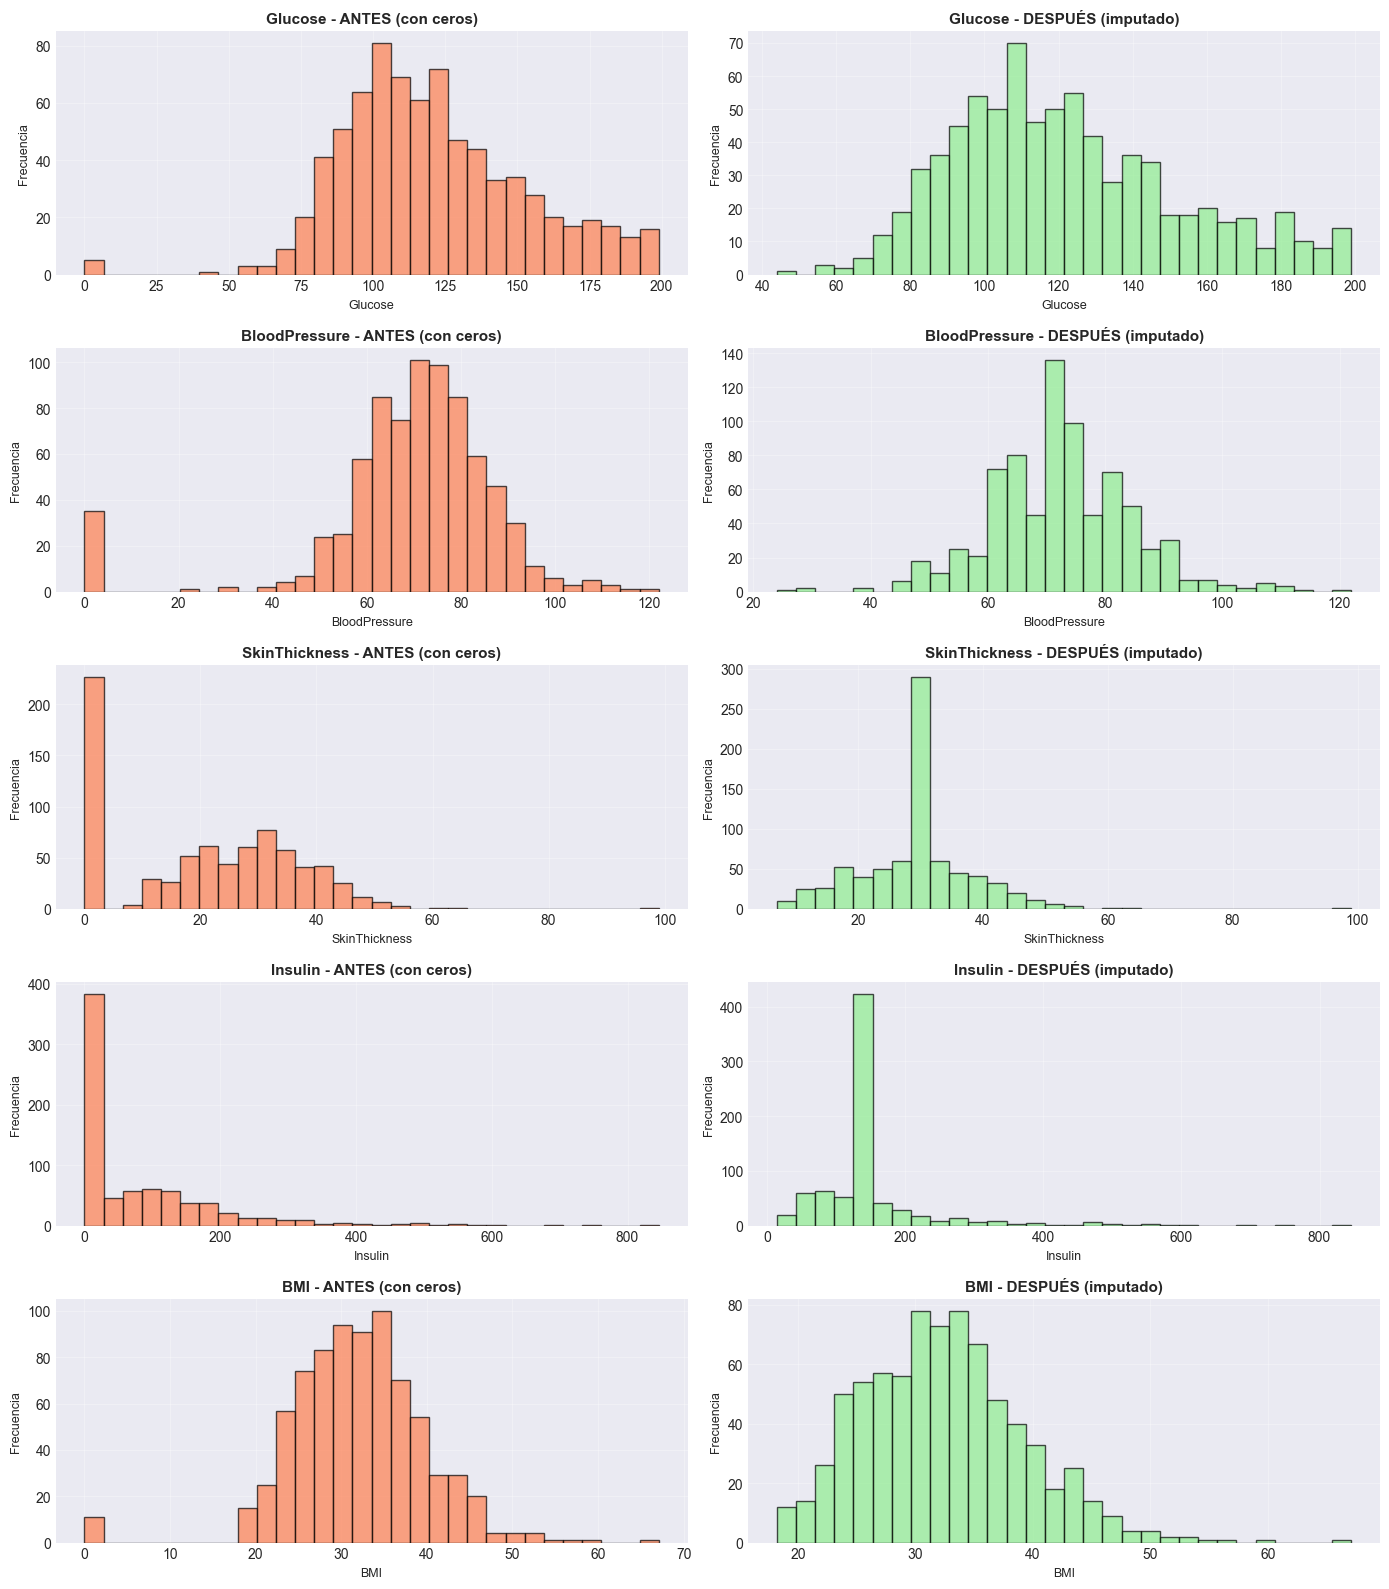

Las distribuciones DESPUÉS de la imputación muestran los valores faltantes reemplazados por la mediana


In [23]:
# Visualización comparativa: Antes vs Después de la imputación
fig, axes = plt.subplots(5, 2, figsize=(14, 16))

for idx, columna in enumerate(columnas_con_ceros_invalidos):
    # Antes (original)
    axes[idx, 0].hist(diabetes_df[columna], bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'{columna} - ANTES (con ceros)', fontsize=11, fontweight='bold')
    axes[idx, 0].set_xlabel(columna, fontsize=9)
    axes[idx, 0].set_ylabel('Frecuencia', fontsize=9)
    axes[idx, 0].grid(alpha=0.3)
    
    # Después (imputado)
    axes[idx, 1].hist(diabetes_preprocessed[columna], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[idx, 1].set_title(f'{columna} - DESPUÉS (imputado)', fontsize=11, fontweight='bold')
    axes[idx, 1].set_xlabel(columna, fontsize=9)
    axes[idx, 1].set_ylabel('Frecuencia', fontsize=9)
    axes[idx, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Las distribuciones DESPUÉS de la imputación muestran los valores faltantes reemplazados por la mediana")

## **8.2. Codificación de Características Categóricas**

### **Análisis de Variables Categóricas**

En el dataset de Diabetes Pima Indians, **todas las características son numéricas**, por lo que NO se requiere codificación categórica (One-Hot Encoding o Label Encoding).

**Variables en el dataset:**
- Pregnancies: Numérica continua
- Glucose: Numérica continua
- BloodPressure: Numérica continua
- SkinThickness: Numérica continua
- Insulin: Numérica continua
- BMI: Numérica continua
- DiabetesPedigreeFunction: Numérica continua
- Age: Numérica continua
- Outcome: Numérica binaria (0/1) - Variable objetivo

**Conclusión:** No se aplicará codificación categórica ya que no es necesaria. Todas las variables ya están en formato numérico adecuado para los algoritmos de Machine Learning.

**Nota educativa:** Si tuviéramos variables categóricas como "Género" o "Tipo de sangre", aplicaríamos:
- **One-Hot Encoding**: Para variables nominales sin orden (ej. tipo de sangre: A, B, AB, O)
- **Label Encoding**: Para variables ordinales con orden (ej. nivel educativo: bajo, medio, alto)

In [24]:
# Verificar tipos de datos de todas las columnas
print("=== TIPOS DE DATOS DE LAS VARIABLES ===\n")
print(diabetes_preprocessed.dtypes)

print("\n=== RESUMEN ===")
print(f"Variables numéricas: {len(diabetes_preprocessed.select_dtypes(include=[np.number]).columns)}")
print(f"Variables categóricas (object): {len(diabetes_preprocessed.select_dtypes(include=['object']).columns)}")

print("\n✓ Todas las variables son numéricas - No se requiere codificación categórica")

=== TIPOS DE DATOS DE LAS VARIABLES ===

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

=== RESUMEN ===
Variables numéricas: 9
Variables categóricas (object): 0

✓ Todas las variables son numéricas - No se requiere codificación categórica


## **8.3. Separación de Características (X) y Variable Objetivo (y)**

Antes de escalar los datos, debemos separar las características predictoras (X) de la variable objetivo (y). Esto es fundamental porque:

1. **No escalamos la variable objetivo** en problemas de clasificación binaria
2. **Evitamos data leakage**: La variable objetivo no debe estar presente durante el entrenamiento de las características
3. **Facilita la división train-test**: Permite estratificar correctamente por la variable objetivo

In [25]:
# Separar características (X) y variable objetivo (y)

# X: Todas las columnas excepto 'Outcome' (características predictoras)
X = diabetes_preprocessed.drop('Outcome', axis=1)

# y: Solo la columna 'Outcome' (variable objetivo - 0: No Diabetes, 1: Diabetes)
y = diabetes_preprocessed['Outcome']

print("=== SEPARACIÓN DE DATOS ===\n")
print(f"Características (X): {X.shape}")
print(f"   - {X.shape[0]} pacientes")
print(f"   - {X.shape[1]} características predictoras")
print(f"\nVariable objetivo (y): {y.shape}")
print(f"   - {y.shape[0]} etiquetas")

print(f"\nNombres de las características (X):")
print(X.columns.tolist())

print(f"\nDistribución de la variable objetivo (y):")
print(y.value_counts())

print("\n✓ Separación completada exitosamente")

=== SEPARACIÓN DE DATOS ===

Características (X): (768, 8)
   - 768 pacientes
   - 8 características predictoras

Variable objetivo (y): (768,)
   - 768 etiquetas

Nombres de las características (X):
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Distribución de la variable objetivo (y):
Outcome
0    500
1    268
Name: count, dtype: int64

✓ Separación completada exitosamente


## **8.4. División del Dataset (Train-Test Split)**

### **Estrategia de División**

Dividiremos el dataset en dos conjuntos:

1. **Conjunto de Entrenamiento (80%)**: Datos usados para entrenar el modelo
2. **Conjunto de Prueba (20%)**: Datos usados para evaluar el rendimiento del modelo en datos no vistos

### **Parámetros importantes:**

- **test_size=0.2**: 20% de los datos para prueba, 80% para entrenamiento
- **random_state=42**: Semilla aleatoria para reproducibilidad (obtener los mismos resultados en cada ejecución)
- **stratify=y**: Mantiene la misma proporción de clases (diabéticas/no diabéticas) en train y test

### **Justificación:**

- **80/20 split**: Es una proporción estándar que balancea tener suficientes datos para entrenar y evaluar
- **Estratificación**: Crucial en problemas médicos para asegurar que ambos conjuntos tengan representación balanceada de casos positivos y negativos
- **Reproducibilidad**: random_state=42 asegura que podamos replicar los resultados

In [26]:
# Importar la función train_test_split de sklearn
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test: Características para entrenar y probar
# y_train, y_test: Etiquetas (Outcome) para entrenar y probar
X_train, X_test, y_train, y_test = train_test_split(
    X,                    # Características
    y,                    # Variable objetivo
    test_size=0.2,        # 20% para prueba, 80% para entrenamiento
    random_state=42,      # Semilla para reproducibilidad
    stratify=y            # Mantener proporción de clases
)

print("=== DIVISIÓN TRAIN-TEST COMPLETADA ===\n")
print(f"Conjunto de ENTRENAMIENTO:")
print(f"   X_train: {X_train.shape} ({X_train.shape[0]} pacientes, {X_train.shape[1]} características)")
print(f"   y_train: {y_train.shape} ({y_train.shape[0]} etiquetas)")

print(f"\nConjunto de PRUEBA:")
print(f"   X_test: {X_test.shape} ({X_test.shape[0]} pacientes, {X_test.shape[1]} características)")
print(f"   y_test: {y_test.shape} ({y_test.shape[0]} etiquetas)")

print(f"\n✓ División completada exitosamente")

=== DIVISIÓN TRAIN-TEST COMPLETADA ===

Conjunto de ENTRENAMIENTO:
   X_train: (614, 8) (614 pacientes, 8 características)
   y_train: (614,) (614 etiquetas)

Conjunto de PRUEBA:
   X_test: (154, 8) (154 pacientes, 8 características)
   y_test: (154,) (154 etiquetas)

✓ División completada exitosamente


In [27]:
# Verificar que la estratificación funcionó correctamente
# Las proporciones de clases deben ser similares en train y test

print("=== VERIFICACIÓN DE ESTRATIFICACIÓN ===\n")

print("Distribución en CONJUNTO ORIGINAL:")
print(y.value_counts(normalize=True).sort_index())
print(f"   No Diabetes (0): {(y == 0).sum()/len(y)*100:.2f}%")
print(f"   Diabetes (1):    {(y == 1).sum()/len(y)*100:.2f}%")

print("\nDistribución en CONJUNTO de ENTRENAMIENTO:")
print(y_train.value_counts(normalize=True).sort_index())
print(f"   No Diabetes (0): {(y_train == 0).sum()/len(y_train)*100:.2f}%")
print(f"   Diabetes (1):    {(y_train == 1).sum()/len(y_train)*100:.2f}%")

print("\nDistribución en CONJUNTO de PRUEBA:")
print(y_test.value_counts(normalize=True).sort_index())
print(f"   No Diabetes (0): {(y_test == 0).sum()/len(y_test)*100:.2f}%")
print(f"   Diabetes (1):    {(y_test == 1).sum()/len(y_test)*100:.2f}%")

print("\n✓ Las proporciones son similares - Estratificación exitosa")

=== VERIFICACIÓN DE ESTRATIFICACIÓN ===

Distribución en CONJUNTO ORIGINAL:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64
   No Diabetes (0): 65.10%
   Diabetes (1):    34.90%

Distribución en CONJUNTO de ENTRENAMIENTO:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64
   No Diabetes (0): 65.15%
   Diabetes (1):    34.85%

Distribución en CONJUNTO de PRUEBA:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64
   No Diabetes (0): 64.94%
   Diabetes (1):    35.06%

✓ Las proporciones son similares - Estratificación exitosa


## **8.5. Escalado de Características Numéricas**

### **Estrategia Seleccionada: StandardScaler (Estandarización)**

**¿Qué hace StandardScaler?**
- Transforma cada característica para tener **media = 0** y **desviación estándar = 1**
- Fórmula: `z = (x - μ) / σ` donde μ es la media y σ es la desviación estándar

**¿Por qué StandardScaler en lugar de MinMaxScaler?**

1. **Robustez ante outliers**: StandardScaler es más robusto que MinMaxScaler cuando hay valores atípicos
2. **Distribuciones no uniformes**: Nuestros datos tienen distribuciones variadas (vimos esto en el EDA)
3. **Algoritmos basados en distancia**: Modelos como Regresión Logística y K-NN se benefician de estandarización
4. **Asumiendo distribución normal**: StandardScaler funciona bien cuando los datos tienen distribución aproximadamente gaussiana

**Comparación:**
- **StandardScaler**: Convierte a media=0, std=1. Mejor para datos con outliers y distribuciones normales
- **MinMaxScaler**: Escala a rango [0,1]. Mejor cuando necesitas valores acotados, pero sensible a outliers

**IMPORTANTE - Evitar Data Leakage:**
- Ajustamos (fit) el scaler **SOLO** con datos de entrenamiento
- Transformamos (transform) tanto entrenamiento como prueba con los mismos parámetros
- Nunca permitir que información del conjunto de prueba influya en el entrenamiento

In [28]:
# Visualizar las escalas originales de las características ANTES del escalado
print("=== ESCALAS ORIGINALES DE LAS CARACTERÍSTICAS ===\n")
print("Estadísticas de X_train (ANTES del escalado):\n")
print(X_train.describe().loc[['mean', 'std', 'min', 'max']].round(2))

=== ESCALAS ORIGINALES DE LAS CARACTERÍSTICAS ===

Estadísticas de X_train (ANTES del escalado):

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
mean         3.82   121.67          72.14          29.04   137.71  32.45   
std          3.31    30.00          12.28           8.89    78.76   6.82   
min          0.00    56.00          24.00           7.00    15.00  18.20   
max         17.00   199.00         122.00          99.00   744.00  67.10   

      DiabetesPedigreeFunction    Age  
mean                      0.48  33.37  
std                       0.33  11.83  
min                       0.08  21.00  
max                       2.33  81.00  


In [29]:
# Importar StandardScaler de sklearn
# StandardScaler estandariza características eliminando la media y escalando a varianza unitaria
from sklearn.preprocessing import StandardScaler

# Crear una instancia del escalador
# Este objeto aprenderá los parámetros de escalado (media y desviación estándar) del conjunto de entrenamiento
scaler = StandardScaler()

print("✓ StandardScaler creado exitosamente")

✓ StandardScaler creado exitosamente


In [30]:
# PASO 1: Ajustar (fit) el scaler con los datos de ENTRENAMIENTO únicamente
# El scaler calcula la media y desviación estándar de cada característica en X_train
# IMPORTANTE: Solo usamos X_train para evitar data leakage
scaler.fit(X_train)

print("=== PARÁMETROS APRENDIDOS POR EL SCALER ===\n")
print("Medias calculadas de cada característica:")
for feature, mean in zip(X_train.columns, scaler.mean_):
    print(f"   {feature:25} -> {mean:7.2f}")

print("\nDesviaciones estándar calculadas:")
for feature, std in zip(X_train.columns, scaler.scale_):
    print(f"   {feature:25} -> {std:7.2f}")

print("\n✓ Scaler ajustado con datos de entrenamiento")

=== PARÁMETROS APRENDIDOS POR EL SCALER ===

Medias calculadas de cada característica:
   Pregnancies               ->    3.82
   Glucose                   ->  121.67
   BloodPressure             ->   72.14
   SkinThickness             ->   29.04
   Insulin                   ->  137.71
   BMI                       ->   32.45
   DiabetesPedigreeFunction  ->    0.48
   Age                       ->   33.37

Desviaciones estándar calculadas:
   Pregnancies               ->    3.31
   Glucose                   ->   29.98
   BloodPressure             ->   12.27
   SkinThickness             ->    8.88
   Insulin                   ->   78.70
   BMI                       ->    6.82
   DiabetesPedigreeFunction  ->    0.33
   Age                       ->   11.82

✓ Scaler ajustado con datos de entrenamiento


In [33]:
# PASO 2: Transformar (transform) los datos de entrenamiento
# Aplicamos la fórmula z = (x - media) / std usando los parámetros calculados anteriormente
X_train_scaled = scaler.transform(X_train)

# Convertir de vuelta a DataFrame para mejor visualización
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

print("=== DATOS DE ENTRENAMIENTO ESCALADOS ===\n")
print(f"Forma: {X_train_scaled.shape}")
print("\nPrimeras filas de X_train_scaled:")
print(X_train_scaled.head())

print("\n✓ Conjunto de entrenamiento escalado exitosamente")

=== DATOS DE ENTRENAMIENTO ESCALADOS ===

Forma: (614, 8)

Primeras filas de X_train_scaled:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
353    -0.851355 -1.056427      -0.826740      -1.918187 -1.203361 -0.769477   
711     0.356576  0.144399       0.477772      -0.229874 -1.470195 -0.417498   
373    -0.549372 -0.556083      -1.152868       1.233330 -0.555335  0.359790   
46     -0.851355  0.811525      -1.315932      -0.004766 -0.161437 -0.402832   
682    -1.153338 -0.889646      -0.663676       1.120776 -0.415565  1.782373   

     DiabetesPedigreeFunction       Age  
353                  0.310794 -0.792169  
711                 -0.116439  0.561034  
373                 -0.764862 -0.707594  
46                   0.262314 -0.369293  
682                 -0.337630 -0.961320  

✓ Conjunto de entrenamiento escalado exitosamente


In [31]:
# PASO 3: Transformar (transform) los datos de PRUEBA
# IMPORTANTE: Usamos transform() (NO fit_transform()) para aplicar los MISMOS parámetros
# que aprendimos del conjunto de entrenamiento. Esto evita data leakage.
X_test_scaled = scaler.transform(X_test)

# Convertir de vuelta a DataFrame
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("=== DATOS DE PRUEBA ESCALADOS ===\n")
print(f"Forma: {X_test_scaled.shape}")
print("\nPrimeras filas de X_test_scaled:")
print(X_test_scaled.head())

print("\n✓ Conjunto de prueba escalado exitosamente")

=== DATOS DE PRUEBA ESCALADOS ===

Forma: (154, 8)

Primeras filas de X_test_scaled:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
44      0.960541  1.245157      -0.663676      -0.004766 -0.161437 -0.740145   
672     1.866489 -1.790266       2.760669      -0.680091 -1.127122  0.447785   
700    -0.549372  0.010974       0.314708      -0.229874  0.791541  0.506448   
630     0.960541 -0.255876      -0.663676      -0.004766 -0.161437 -0.740145   
81     -0.549372 -1.590128      -0.011420      -0.004766 -0.161437 -0.021521   

     DiabetesPedigreeFunction       Age  
44                  -0.555791  0.561034  
672                 -0.583061  1.153060  
700                  0.016882 -0.623019  
630                  0.771356  0.053583  
81                  -1.137554 -0.961320  

✓ Conjunto de prueba escalado exitosamente


In [34]:
# Verificar que el escalado funcionó correctamente
# Después del escalado, todas las características deberían tener media ≈ 0 y std ≈ 1

print("=== VERIFICACIÓN DEL ESCALADO ===\n")
print("Estadísticas de X_train_scaled (DESPUÉS del escalado):\n")
print(X_train_scaled.describe().loc[['mean', 'std', 'min', 'max']].round(4))

print("\n" + "="*80)
print("COMPARACIÓN: Antes vs Después del escalado")
print("="*80 + "\n")

# Crear tabla comparativa
comparison = pd.DataFrame({
    'Antes - Min': X_train.min(),
    'Antes - Max': X_train.max(),
    'Antes - Media': X_train.mean(),
    'Después - Min': X_train_scaled.min(),
    'Después - Max': X_train_scaled.max(),
    'Después - Media': X_train_scaled.mean(),
    'Después - Std': X_train_scaled.std()
})

print(comparison.round(2))

print("\n✓ Escalado verificado - Todas las características tienen media ≈ 0 y std ≈ 1")

=== VERIFICACIÓN DEL ESCALADO ===

Estadísticas de X_train_scaled (DESPUÉS del escalado):

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
mean      -0.0000  -0.0000         0.0000        -0.0000  -0.0000 -0.0000   
std        1.0008   1.0008         1.0008         1.0008   1.0008  1.0008   
min       -1.1533  -2.1905        -3.9250        -2.4810  -1.5591 -2.0894   
max        3.9804   2.5794         4.0652         7.8740   7.7038  5.0822   

      DiabetesPedigreeFunction     Age  
mean                   -0.0000 -0.0000  
std                     1.0008  1.0008  
min                    -1.1921 -1.0459  
max                     5.6103  4.0286  

COMPARACIÓN: Antes vs Después del escalado

                          Antes - Min  Antes - Max  Antes - Media  \
Pregnancies                      0.00        17.00           3.82   
Glucose                         56.00       199.00         121.67   
BloodPressure                   24.00       122.00          72.14 

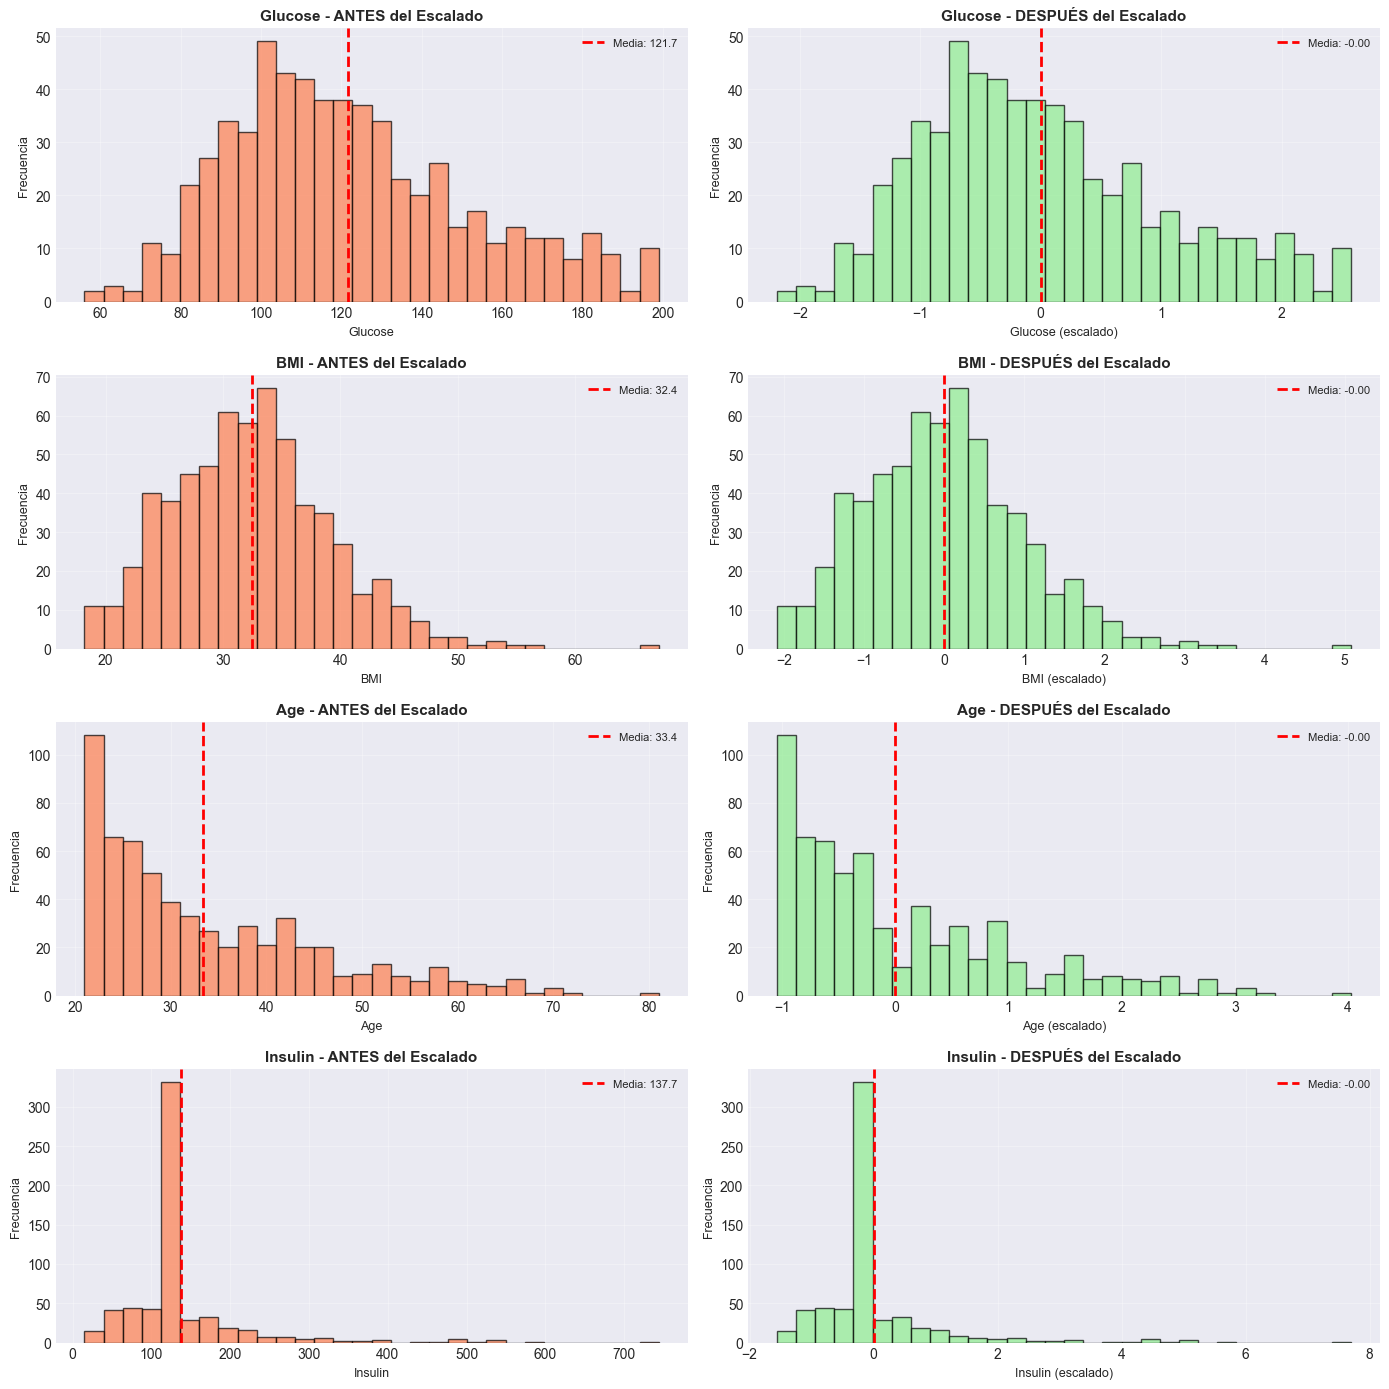

Observa cómo las distribuciones mantienen su forma pero ahora están centradas en 0


In [35]:
# Visualización: Comparación de distribuciones antes y después del escalado
# Seleccionamos 4 características para visualizar

features_to_plot = ['Glucose', 'BMI', 'Age', 'Insulin']

fig, axes = plt.subplots(4, 2, figsize=(14, 14))

for idx, feature in enumerate(features_to_plot):
    # Antes del escalado
    axes[idx, 0].hist(X_train[feature], bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'{feature} - ANTES del Escalado', fontsize=11, fontweight='bold')
    axes[idx, 0].set_xlabel(feature, fontsize=9)
    axes[idx, 0].set_ylabel('Frecuencia', fontsize=9)
    axes[idx, 0].axvline(X_train[feature].mean(), color='red', linestyle='--', 
                         linewidth=2, label=f'Media: {X_train[feature].mean():.1f}')
    axes[idx, 0].legend(fontsize=8)
    axes[idx, 0].grid(alpha=0.3)
    
    # Después del escalado
    axes[idx, 1].hist(X_train_scaled[feature], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[idx, 1].set_title(f'{feature} - DESPUÉS del Escalado', fontsize=11, fontweight='bold')
    axes[idx, 1].set_xlabel(f'{feature} (escalado)', fontsize=9)
    axes[idx, 1].set_ylabel('Frecuencia', fontsize=9)
    axes[idx, 1].axvline(X_train_scaled[feature].mean(), color='red', linestyle='--', 
                         linewidth=2, label=f'Media: {X_train_scaled[feature].mean():.2f}')
    axes[idx, 1].legend(fontsize=8)
    axes[idx, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Observa cómo las distribuciones mantienen su forma pero ahora están centradas en 0")

## **8.6. Resumen del Preprocesamiento**

In [36]:
print("="*80)
print(" "*25 + "RESUMEN DEL PREPROCESAMIENTO")
print("="*80)

print("\n PASOS COMPLETADOS:\n")

print("1. ✓ MANEJO DE VALORES FALTANTES")
print("   Estrategia: Imputación por mediana")
print("   Justificación: Robusta ante outliers, preserva la distribución")
print(f"   Valores imputados en 5 columnas:")
for col in columnas_con_ceros_invalidos:
    print(f"      • {col}")

print("\n2. ✓ CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("   Estrategia: No aplicada")
print("   Justificación: Todas las variables son numéricas")

print("\n3. ✓ SEPARACIÓN X e y")
print(f"   Características (X): {X.shape[1]} variables")
print(f"   Variable objetivo (y): Outcome (binaria)")

print("\n4. ✓ DIVISIÓN TRAIN-TEST")
print(f"   Entrenamiento: {X_train.shape[0]} pacientes ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Prueba: {X_test.shape[0]} pacientes ({X_test.shape[0]/len(X)*100:.1f}%)")
print("   Estratificación: Activada (mantiene proporción de clases)")

print("\n5. ✓ ESCALADO DE CARACTERÍSTICAS")
print("   Estrategia: StandardScaler (Estandarización)")
print("   Justificación: Robusta ante outliers, ideal para regresión logística y k-NN")
print("   Resultado: Media ≈ 0, Desviación Estándar ≈ 1")

print("\n DATOS LISTOS PARA MODELADO:\n")
print(f"   X_train_scaled: {X_train_scaled.shape}")
print(f"   X_test_scaled:  {X_test_scaled.shape}")
print(f"   y_train:        {y_train.shape}")
print(f"   y_test:         {y_test.shape}")

print("\n PRÓXIMO PASO:")
print("   Entrenar modelos de Machine Learning (Regresión Logística, k-NN, etc.)")

print("\n" + "="*80)

                         RESUMEN DEL PREPROCESAMIENTO

 PASOS COMPLETADOS:

1. ✓ MANEJO DE VALORES FALTANTES
   Estrategia: Imputación por mediana
   Justificación: Robusta ante outliers, preserva la distribución
   Valores imputados en 5 columnas:
      • Glucose
      • BloodPressure
      • SkinThickness
      • Insulin
      • BMI

2. ✓ CODIFICACIÓN DE VARIABLES CATEGÓRICAS
   Estrategia: No aplicada
   Justificación: Todas las variables son numéricas

3. ✓ SEPARACIÓN X e y
   Características (X): 8 variables
   Variable objetivo (y): Outcome (binaria)

4. ✓ DIVISIÓN TRAIN-TEST
   Entrenamiento: 614 pacientes (79.9%)
   Prueba: 154 pacientes (20.1%)
   Estratificación: Activada (mantiene proporción de clases)

5. ✓ ESCALADO DE CARACTERÍSTICAS
   Estrategia: StandardScaler (Estandarización)
   Justificación: Robusta ante outliers, ideal para regresión logística y k-NN
   Resultado: Media ≈ 0, Desviación Estándar ≈ 1

 DATOS LISTOS PARA MODELADO:

   X_train_scaled: (614, 8)
   X_tes

# **9. Selección y Entrenamiento de Modelos**

En esta sección entrenaremos múltiples algoritmos de Machine Learning para predecir diabetes y compararemos su rendimiento. El objetivo es encontrar el modelo que mejor generalice y pueda hacer predicciones precisas en datos no vistos.

## **Modelos Seleccionados:**

1. **Regresión Logística**: Modelo lineal clásico para clasificación binaria
2. **K-Vecinos Más Cercanos (k-NN)**: Algoritmo basado en distancia que clasifica según vecinos similares
3. **Random Forest (Bonificación)**: Ensemble de árboles de decisión que reduce overfitting

## **¿Por qué estos modelos?**

**Regresión Logística:**
- Simple, interpretable y rápido
- Funciona bien cuando hay relación lineal entre características y la variable objetivo
- Proporciona probabilidades de predicción
- Ideal como modelo baseline en problemas médicos

**K-Vecinos Más Cercanos (k-NN):**
- No paramétrico, no asume distribución de datos
- Captura relaciones no lineales
- Intuitivo: "pacientes similares tienen resultados similares"
- Sensible al escalado (por eso usamos StandardScaler)

**Random Forest:**
- Maneja bien datos complejos y no lineales
- Robusto ante overfitting
- Proporciona importancia de características
- Alto rendimiento en problemas médicos

## **Estrategia de Entrenamiento:**

1. Entrenar cada modelo con parámetros por defecto
2. Evaluar rendimiento inicial
3. Ajustar hiperparámetros con GridSearchCV para optimizar
4. Comparar todos los modelos

**Referencia:** https://scikit-learn.org/stable/supervised_learning.html

## **9.1. Modelo 1: Regresión Logística**

### **¿Qué es la Regresión Logística?**

La Regresión Logística es un algoritmo de clasificación supervisada que modela la probabilidad de que una observación pertenezca a una clase particular. A pesar de su nombre, es un modelo de **clasificación**, no de regresión.

### **Características principales:**

1. **Función Sigmoide**: Utiliza la función logística para convertir valores lineales en probabilidades entre 0 y 1
2. **Modelo Lineal**: Asume una relación lineal entre las características y el log-odds del resultado
3. **Interpretabilidad**: Los coeficientes indican la importancia y dirección de cada característica
4. **Probabilidades**: Proporciona probabilidades de predicción, no solo clases

### **¿Cuándo usar Regresión Logística?**

- Cuando necesitas interpretabilidad (ej. en diagnósticos médicos)
- Problemas de clasificación binaria o multiclase
- Cuando las características tienen relación aproximadamente lineal con el resultado
- Como modelo baseline para comparación

### **Ventajas en Problemas Médicos:**
- Fácil de entender para profesionales de la salud
- Proporciona probabilidades (ej. "85% de probabilidad de diabetes")
- Entrenamiento rápido
- Funciona bien con datos escalados

In [37]:
# Importar el modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression

# Crear una instancia del modelo de Regresión Logística
# max_iter=1000 asegura que el algoritmo converja (alcance la solución óptima)
# random_state=42 para reproducibilidad
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

print("✓ Modelo de Regresión Logística creado exitosamente")
print(f"\nParámetros por defecto del modelo:")
print(logistic_model.get_params())

✓ Modelo de Regresión Logística creado exitosamente

Parámetros por defecto del modelo:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [38]:
# Entrenar el modelo con los datos de entrenamiento escalados
# fit() ajusta el modelo encontrando los coeficientes óptimos que relacionan
# las características con la probabilidad de diabetes

import time

print("=== ENTRENANDO REGRESIÓN LOGÍSTICA ===\n")
start_time = time.time()

logistic_model.fit(X_train_scaled, y_train)

training_time = time.time() - start_time

print(f"✓ Modelo entrenado exitosamente en {training_time:.4f} segundos")
print(f"\nCoeficientes del modelo (importancia de cada característica):")
for feature, coef in zip(X_train.columns, logistic_model.coef_[0]):
    print(f"   {feature:25} -> {coef:7.4f}")

=== ENTRENANDO REGRESIÓN LOGÍSTICA ===

✓ Modelo entrenado exitosamente en 0.0061 segundos

Coeficientes del modelo (importancia de cada característica):
   Pregnancies               ->  0.3775
   Glucose                   ->  1.1825
   BloodPressure             -> -0.0441
   SkinThickness             ->  0.0282
   Insulin                   -> -0.0662
   BMI                       ->  0.6887
   DiabetesPedigreeFunction  ->  0.2334
   Age                       ->  0.1478


In [39]:
# Hacer predicciones en el conjunto de prueba
# predict() retorna las clases predichas (0 o 1)
# predict_proba() retorna las probabilidades de cada clase
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_proba_logistic = logistic_model.predict_proba(X_test_scaled)

print("=== PREDICCIONES DE REGRESIÓN LOGÍSTICA ===\n")
print(f"Primeras 10 predicciones:")
print(f"{'Real':<6} {'Predicho':<10} {'Prob No Diabetes':<20} {'Prob Diabetes':<15}")
print("-" * 60)

for i in range(10):
    real = y_test.iloc[i]
    pred = y_pred_logistic[i]
    prob_0 = y_pred_proba_logistic[i][0]
    prob_1 = y_pred_proba_logistic[i][1]
    print(f"{real:<6} {pred:<10} {prob_0:<20.4f} {prob_1:<15.4f}")

print(f"\n✓ Predicciones completadas en {X_test_scaled.shape[0]} pacientes")

=== PREDICCIONES DE REGRESIÓN LOGÍSTICA ===

Primeras 10 predicciones:
Real   Predicho   Prob No Diabetes     Prob Diabetes  
------------------------------------------------------------
0      1          0.3903               0.6097         
0      0          0.8816               0.1184         
0      0          0.7065               0.2935         
1      0          0.7492               0.2508         
0      0          0.9668               0.0332         
0      0          0.8315               0.1685         
1      0          0.5118               0.4882         
1      1          0.0763               0.9237         
0      0          0.9186               0.0814         
0      1          0.1614               0.8386         

✓ Predicciones completadas en 154 pacientes


In [62]:
# Evaluar el rendimiento del modelo en el conjunto de entrenamiento
train_score_logistic = logistic_model.score(X_train_scaled, y_train)

# Evaluar el rendimiento del modelo en el conjunto de prueba
test_score_logistic = logistic_model.score(X_test_scaled, y_test)

print("=== RENDIMIENTO DE REGRESIÓN LOGÍSTICA ===\n")
print(f"Accuracy en ENTRENAMIENTO: {train_score_logistic:.4f} ({train_score_logistic*100:.2f}%)")
print(f"Accuracy en PRUEBA:        {test_score_logistic:.4f} ({test_score_logistic*100:.2f}%)")

# Diferencia entre train y test (indica overfitting si es muy grande)
diff = train_score_logistic - test_score_logistic
print(f"\nDiferencia: {diff:.4f}")

if diff < 0.05:
    print("✓ Buen balance - No hay overfitting significativo")
elif diff < 0.10:
    print("⚠ Ligero overfitting")
else:
    print("❌ Overfitting - El modelo se ajustó demasiado a los datos de entrenamiento")

=== RENDIMIENTO DE REGRESIÓN LOGÍSTICA ===

Accuracy en ENTRENAMIENTO: 0.7964 (79.64%)
Accuracy en PRUEBA:        0.7078 (70.78%)

Diferencia: 0.0886
⚠ Ligero overfitting


## **9.2. Modelo 2: K-Vecinos Más Cercanos (k-NN)**

### **¿Qué es k-NN?**

K-Nearest Neighbors (k-NN) es un algoritmo de clasificación no paramétrico que clasifica nuevas observaciones basándose en la "similitud" con las observaciones de entrenamiento más cercanas.

### **Características principales:**

1. **Basado en distancia**: Usa distancia euclidiana (u otra métrica) para encontrar vecinos similares
2. **No paramétrico**: No hace suposiciones sobre la distribución de los datos
3. **Lazy learning**: No construye un modelo explícito, guarda todos los datos de entrenamiento
4. **Hiperparámetro k**: Número de vecinos a considerar (k=5 es común)

### **¿Cómo funciona?**

1. Para una nueva paciente, calcula la distancia a todas las pacientes de entrenamiento
2. Identifica las k pacientes más cercanas (vecinos)
3. Clasifica basándose en la mayoría de votos de esos k vecinos
4. Ejemplo: Si k=5 y 4 de los 5 vecinos más cercanos tienen diabetes, predice diabetes

### **¿Cuándo usar k-NN?**

- Cuando las relaciones en los datos son no lineales
- Conjuntos de datos pequeños a medianos (es lento con muchos datos)
- Cuando "pacientes similares tienen resultados similares"
- Problemas donde la frontera de decisión es compleja

### **Ventajas en Problemas Médicos:**
- Intuitivo: "Esta paciente es similar a otras que tienen diabetes"
- No requiere entrenamiento largo
- Captura patrones complejos

### **Desventajas:**
- Sensible al escalado (por eso usamos StandardScaler)
- Lento en predicción con muchos datos
- Sensible a características irrelevantes

**Hiperparámetro clave:** `n_neighbors` (k) - Número de vecinos a considerar

In [78]:
# Importar el modelo K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Crear una instancia del modelo k-NN
# n_neighbors=5: consideraremos los 5 vecinos más cercanos (valor por defecto común)
# metric='euclidean': usaremos distancia euclidiana para medir similitud
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

print("✓ Modelo k-NN creado exitosamente")
print(f"\nParámetros por defecto del modelo:")
print(knn_model.get_params())

✓ Modelo k-NN creado exitosamente

Parámetros por defecto del modelo:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [79]:
# Entrenar el modelo k-NN con los datos de entrenamiento escalados
# En k-NN, "entrenar" significa simplemente guardar los datos de entrenamiento
# (es un algoritmo "lazy learning")

print("=== ENTRENANDO K-NN ===\n")
start_time = time.time()

knn_model.fit(X_train_scaled, y_train)

training_time = time.time() - start_time

print(f"✓ Modelo k-NN 'entrenado' exitosamente en {training_time:.4f} segundos")
print(f"\nNúmero de muestras almacenadas: {knn_model.n_samples_fit_}")
print(f"Número de características: {knn_model.n_features_in_}")
print(f"Vecinos considerados (k): {knn_model.n_neighbors}")

=== ENTRENANDO K-NN ===

✓ Modelo k-NN 'entrenado' exitosamente en 0.0028 segundos

Número de muestras almacenadas: 614
Número de características: 8
Vecinos considerados (k): 5


In [80]:
# Hacer predicciones en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)

print("=== PREDICCIONES DE K-NN ===\n")
print(f"Primeras 10 predicciones:")
print(f"{'Real':<6} {'Predicho':<10} {'Prob No Diabetes':<20} {'Prob Diabetes':<15}")
print("-" * 60)

for i in range(10):
    real = y_test.iloc[i]
    pred = y_pred_knn[i]
    prob_0 = y_pred_proba_knn[i][0]
    prob_1 = y_pred_proba_knn[i][1]
    print(f"{real:<6} {pred:<10} {prob_0:<20.4f} {prob_1:<15.4f}")

print(f"\n✓ Predicciones completadas en {X_test_scaled.shape[0]} pacientes")

=== PREDICCIONES DE K-NN ===

Primeras 10 predicciones:
Real   Predicho   Prob No Diabetes     Prob Diabetes  
------------------------------------------------------------
0      1          0.4000               0.6000         
0      0          0.8000               0.2000         
0      0          0.8000               0.2000         
1      1          0.4000               0.6000         
0      0          1.0000               0.0000         
0      0          0.8000               0.2000         
1      0          0.8000               0.2000         
1      1          0.2000               0.8000         
0      0          1.0000               0.0000         
0      1          0.4000               0.6000         

✓ Predicciones completadas en 154 pacientes


In [81]:
# Evaluar el rendimiento del modelo k-NN
train_score_knn = knn_model.score(X_train_scaled, y_train)
test_score_knn = knn_model.score(X_test_scaled, y_test)

print("=== RENDIMIENTO DE K-NN ===\n")
print(f"Accuracy en ENTRENAMIENTO: {train_score_knn:.4f} ({train_score_knn*100:.2f}%)")
print(f"Accuracy en PRUEBA:        {test_score_knn:.4f} ({test_score_knn*100:.2f}%)")

diff = train_score_knn - test_score_knn
print(f"\nDiferencia: {diff:.4f}")

if diff < 0.05:
    print("✓ Buen balance - No hay overfitting significativo")
elif diff < 0.10:
    print("⚠ Ligero overfitting")
else:
    print("❌ Overfitting - El modelo se ajustó demasiado a los datos de entrenamiento")

=== RENDIMIENTO DE K-NN ===

Accuracy en ENTRENAMIENTO: 0.8306 (83.06%)
Accuracy en PRUEBA:        0.7532 (75.32%)

Diferencia: 0.0774
⚠ Ligero overfitting


## **9.3. Modelo 3: Random Forest (Bonificación)**

### **¿Qué es Random Forest?**

Random Forest es un algoritmo de **ensemble learning** que combina múltiples árboles de decisión para hacer predicciones más robustas y precisas. Es uno de los algoritmos más populares y efectivos en Machine Learning.

### **Características principales:**

1. **Ensemble de árboles**: Entrena muchos árboles de decisión independientes
2. **Voting**: Combina las predicciones de todos los árboles (mayoría de votos)
3. **Randomización**: Cada árbol se entrena con una muestra aleatoria de datos y características
4. **Reduce overfitting**: La combinación de árboles reduce el riesgo de sobreajuste

### **¿Cómo funciona?**

1. Crea N árboles de decisión (ej. 100 árboles)
2. Cada árbol se entrena con:
   - Una muestra aleatoria de pacientes (bootstrap sampling)
   - Un subconjunto aleatorio de características
3. Para predecir, cada árbol "vota" y se toma la decisión mayoritaria
4. Ejemplo: Si 70 de 100 árboles predicen diabetes, la predicción final es diabetes

### **¿Cuándo usar Random Forest?**

- Cuando necesitas alto rendimiento predictivo
- Datos con relaciones complejas y no lineales
- Cuando tienes muchas características
- Problemas donde la interpretabilidad no es crítica

### **Ventajas en Problemas Médicos:**
- Alto rendimiento y precisión
- Maneja bien datos desbalanceados
- Proporciona importancia de características (qué variables son más predictivas)
- Robusto ante datos ruidosos y outliers
- Menos propenso a overfitting que un solo árbol

### **Hiperparámetros clave:**
- **n_estimators**: Número de árboles (más árboles = mejor rendimiento pero más lento)
- **max_depth**: Profundidad máxima de cada árbol
- **min_samples_split**: Mínimo de muestras para dividir un nodo
- **max_features**: Número de características a considerar en cada división

In [43]:
# Importar el modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

# Crear una instancia del modelo Random Forest
# n_estimators=100: entrenaremos 100 árboles de decisión
# random_state=42: para reproducibilidad
# max_depth=None: los árboles crecen hasta que todas las hojas sean puras (o alcancen otros criterios)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None)

print("✓ Modelo Random Forest creado exitosamente")
print(f"\nParámetros por defecto del modelo:")
print(f"   Número de árboles: {rf_model.n_estimators}")
print(f"   Profundidad máxima: {rf_model.max_depth}")
print(f"   Random state: {rf_model.random_state}")

✓ Modelo Random Forest creado exitosamente

Parámetros por defecto del modelo:
   Número de árboles: 100
   Profundidad máxima: None
   Random state: 42


In [45]:
# Entrenar el modelo Random Forest con los datos de entrenamiento
# Esto puede tomar más tiempo que los modelos anteriores porque entrena 100 árboles

print("=== ENTRENANDO RANDOM FOREST ===\n")
start_time = time.time()

rf_model.fit(X_train_scaled, y_train)

training_time = time.time() - start_time

print(f"✓ Modelo Random Forest entrenado exitosamente en {training_time:.4f} segundos")
print(f"\nNúmero de árboles entrenados: {len(rf_model.estimators_)}")
print(f"Número de características usadas: {rf_model.n_features_in_}")

=== ENTRENANDO RANDOM FOREST ===

✓ Modelo Random Forest entrenado exitosamente en 0.1839 segundos

Número de árboles entrenados: 100
Número de características usadas: 8


In [46]:
# Hacer predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)

print("=== PREDICCIONES DE RANDOM FOREST ===\n")
print(f"Primeras 10 predicciones:")
print(f"{'Real':<6} {'Predicho':<10} {'Prob No Diabetes':<20} {'Prob Diabetes':<15}")
print("-" * 60)

for i in range(10):
    real = y_test.iloc[i]
    pred = y_pred_rf[i]
    prob_0 = y_pred_proba_rf[i][0]
    prob_1 = y_pred_proba_rf[i][1]
    print(f"{real:<6} {pred:<10} {prob_0:<20.4f} {prob_1:<15.4f}")

print(f"\n✓ Predicciones completadas en {X_test_scaled.shape[0]} pacientes")

=== PREDICCIONES DE RANDOM FOREST ===

Primeras 10 predicciones:
Real   Predicho   Prob No Diabetes     Prob Diabetes  
------------------------------------------------------------
0      1          0.3300               0.6700         
0      0          0.7600               0.2400         
0      0          0.9200               0.0800         
1      0          0.7100               0.2900         
0      0          0.9200               0.0800         
0      0          0.7200               0.2800         
1      1          0.4900               0.5100         
1      1          0.2300               0.7700         
0      0          0.9000               0.1000         
0      1          0.1800               0.8200         

✓ Predicciones completadas en 154 pacientes


In [56]:
# Evaluar el rendimiento del modelo Random Forest
train_score_rf = rf_model.score(X_train_scaled, y_train)
test_score_rf = rf_model.score(X_test_scaled, y_test)

print("=== RENDIMIENTO DE RANDOM FOREST ===\n")
print(f"Accuracy en ENTRENAMIENTO: {train_score_rf:.4f} ({train_score_rf*100:.2f}%)")
print(f"Accuracy en PRUEBA:        {test_score_rf:.4f} ({test_score_rf*100:.2f}%)")

diff = train_score_rf - test_score_rf
print(f"\nDiferencia: {diff:.4f}")

if diff < 0.05:
    print("✓ Buen balance - No hay overfitting significativo")
elif diff < 0.10:
    print("⚠ Ligero overfitting")
else:
    print("❌ Overfitting - El modelo se ajustó demasiado a los datos de entrenamiento")

=== RENDIMIENTO DE RANDOM FOREST ===

Accuracy en ENTRENAMIENTO: 1.0000 (100.00%)
Accuracy en PRUEBA:        0.7792 (77.92%)

Diferencia: 0.2208
❌ Overfitting - El modelo se ajustó demasiado a los datos de entrenamiento


=== IMPORTANCIA DE CARACTERÍSTICAS (RANDOM FOREST) ===

                 Feature  Importance
                 Glucose    0.274086
                     BMI    0.161903
DiabetesPedigreeFunction    0.125020
                     Age    0.112985
                 Insulin    0.091224
           BloodPressure    0.083518
             Pregnancies    0.080795
           SkinThickness    0.070468


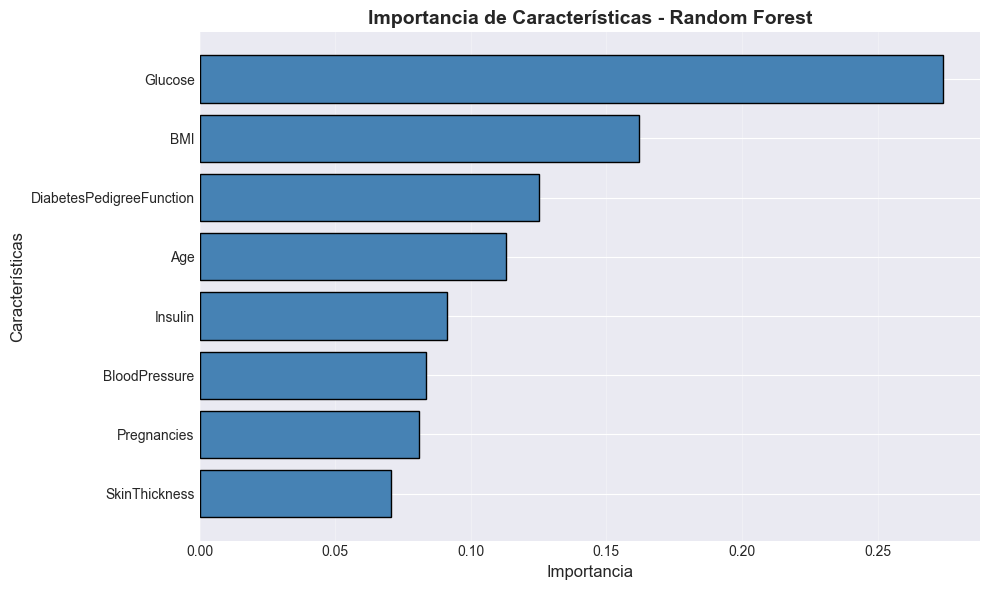


📊 Las características más importantes son las que más contribuyen a las predicciones del modelo


In [57]:
# Analizar la importancia de características en Random Forest
# Esto nos dice qué variables son más importantes para predecir diabetes

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("=== IMPORTANCIA DE CARACTERÍSTICAS (RANDOM FOREST) ===\n")
print(feature_importance.to_string(index=False))

# Visualizar la importancia de características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue', edgecolor='black')
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.title('Importancia de Características - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Invertir para que la más importante esté arriba
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n📊 Las características más importantes son las que más contribuyen a las predicciones del modelo")

## **9.4. Ajuste de Hiperparámetros con GridSearchCV**

### **¿Qué es GridSearchCV?**

GridSearchCV es una herramienta de scikit-learn que realiza **búsqueda exhaustiva** de los mejores hiperparámetros para un modelo. "Grid" significa que prueba todas las combinaciones posibles de un conjunto de parámetros.

### **¿Cómo funciona?**

1. Defines un "grid" (rejilla) de hiperparámetros a probar
2. GridSearchCV prueba TODAS las combinaciones posibles
3. Para cada combinación, realiza **validación cruzada** (cross-validation)
4. Selecciona la combinación con mejor rendimiento promedio
5. Retorna el modelo entrenado con los mejores parámetros

### **Validación Cruzada (Cross-Validation):**

En lugar de dividir los datos en train/test una sola vez, la validación cruzada:
- Divide los datos de entrenamiento en K "folds" (grupos)
- Entrena K veces, cada vez usando un fold diferente como validación
- Promedia los resultados para obtener una estimación más robusta

**Ejemplo con cv=5:**
1. Entrena con folds 1,2,3,4 → Valida con fold 5
2. Entrena con folds 1,2,3,5 → Valida con fold 4
3. Entrena con folds 1,2,4,5 → Valida con fold 3
4. Entrena con folds 1,3,4,5 → Valida con fold 2
5. Entrena con folds 2,3,4,5 → Valida con fold 1
Promedia los 5 resultados

### **¿Por qué usar GridSearchCV?**

- **Optimización automática**: Encuentra los mejores parámetros sin hacerlo manualmente
- **Evita overfitting**: La validación cruzada asegura que el modelo generalice bien
- **Resultados confiables**: Promedia múltiples evaluaciones

### **Desventaja:**
- Puede ser LENTO (prueba muchas combinaciones)

### **Aplicación:**
Usaremos GridSearchCV para optimizar los hiperparámetros de **Random Forest**, buscando la mejor combinación de:
- `n_estimators`: Número de árboles
- `max_depth`: Profundidad máxima de los árboles
- `min_samples_split`: Mínimo de muestras para dividir un nodo
- `min_samples_leaf`: Mínimo de muestras en una hoja

In [49]:
# Importar GridSearchCV
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros a probar para Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],           # Número de árboles a probar
    'max_depth': [None, 10, 20, 30],          # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],          # Mínimo de muestras para dividir
    'min_samples_leaf': [1, 2, 4]             # Mínimo de muestras en hojas
}

print("=== GRID DE HIPERPARÁMETROS ===\n")
print("Parámetros a probar:")
for param, values in param_grid.items():
    print(f"   {param:20} -> {values}")

# Calcular el número total de combinaciones
total_combinations = 1
for values in param_grid.values():
    total_combinations *= len(values)

print(f"\nTotal de combinaciones: {total_combinations}")
print(f"Con 5-fold cross-validation: {total_combinations * 5} entrenamientos totales")
print("\n⏱ ADVERTENCIA: Esto puede tomar varios minutos...")

=== GRID DE HIPERPARÁMETROS ===

Parámetros a probar:
   n_estimators         -> [50, 100, 200]
   max_depth            -> [None, 10, 20, 30]
   min_samples_split    -> [2, 5, 10]
   min_samples_leaf     -> [1, 2, 4]

Total de combinaciones: 108
Con 5-fold cross-validation: 540 entrenamientos totales

⏱ ADVERTENCIA: Esto puede tomar varios minutos...


In [50]:
# Crear GridSearchCV
# cv=5: validación cruzada con 5 folds
# scoring='accuracy': métrica de evaluación (podría ser 'f1', 'roc_auc', etc.)
# n_jobs=-1: usar todos los procesadores disponibles para acelerar
# verbose=2: mostrar progreso detallado

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',      # Métrica a optimizar
    n_jobs=-1,              # Usar todos los procesadores
    verbose=2               # Mostrar progreso
)

print("✓ GridSearchCV configurado exitosamente")
print(f"\nConfiguración:")
print(f"   Validación cruzada: {grid_search.cv} folds")
print(f"   Métrica de evaluación: {grid_search.scoring}")
print(f"   Procesadores: Todos disponibles")

✓ GridSearchCV configurado exitosamente

Configuración:
   Validación cruzada: 5 folds
   Métrica de evaluación: accuracy
   Procesadores: Todos disponibles


In [51]:
# Ejecutar GridSearchCV - Esto probará todas las combinaciones de parámetros
# ADVERTENCIA: Puede tomar varios minutos dependiendo de tu computadora

print("=== EJECUTANDO GRIDSEARCHCV ===")
print("Buscando los mejores hiperparámetros para Random Forest...")
print("Esto puede tardar varios minutos, por favor espera...\n")

start_time = time.time()

# Entrenar con todas las combinaciones de hiperparámetros
grid_search.fit(X_train_scaled, y_train)

grid_search_time = time.time() - start_time

print(f"\n✓ GridSearchCV completado en {grid_search_time:.2f} segundos ({grid_search_time/60:.2f} minutos)")

=== EJECUTANDO GRIDSEARCHCV ===
Buscando los mejores hiperparámetros para Random Forest...
Esto puede tardar varios minutos, por favor espera...

Fitting 5 folds for each of 108 candidates, totalling 540 fits

✓ GridSearchCV completado en 24.15 segundos (0.40 minutos)


In [58]:
# Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print("=== RESULTADOS DE GRIDSEARCHCV ===\n")
print("Mejores hiperparámetros encontrados:")
for param, value in best_params.items():
    print(f"   {param:20} -> {value}")

print(f"\nMejor score de validación cruzada: {best_score:.4f} ({best_score*100:.2f}%)")
print("\nEste es el promedio de accuracy en los 5 folds de validación cruzada")

# El mejor modelo ya está entrenado con TODOS los datos de entrenamiento
# usando los mejores parámetros encontrados
print("\n✓ Modelo óptimo entrenado y listo para usar")

=== RESULTADOS DE GRIDSEARCHCV ===

Mejores hiperparámetros encontrados:
   max_depth            -> 10
   min_samples_leaf     -> 4
   min_samples_split    -> 2
   n_estimators         -> 50

Mejor score de validación cruzada: 0.7801 (78.01%)

Este es el promedio de accuracy en los 5 folds de validación cruzada

✓ Modelo óptimo entrenado y listo para usar


In [59]:
# Evaluar el modelo optimizado en el conjunto de prueba
y_pred_rf_optimized = best_model.predict(X_test_scaled)
y_pred_proba_rf_optimized = best_model.predict_proba(X_test_scaled)

train_score_rf_optimized = best_model.score(X_train_scaled, y_train)
test_score_rf_optimized = best_model.score(X_test_scaled, y_test)

print("=== RENDIMIENTO DEL RANDOM FOREST OPTIMIZADO ===\n")
print(f"Accuracy en ENTRENAMIENTO: {train_score_rf_optimized:.4f} ({train_score_rf_optimized*100:.2f}%)")
print(f"Accuracy en PRUEBA:        {test_score_rf_optimized:.4f} ({test_score_rf_optimized*100:.2f}%)")

diff = train_score_rf_optimized - test_score_rf_optimized
print(f"\nDiferencia: {diff:.4f}")

print("\n=== COMPARACIÓN: Random Forest Original vs Optimizado ===")
print(f"RF Original - Test Accuracy:   {test_score_rf:.4f}")
print(f"RF Optimizado - Test Accuracy: {test_score_rf_optimized:.4f}")
improvement = test_score_rf_optimized - test_score_rf
print(f"Mejora: {improvement:+.4f} ({improvement*100:+.2f}%)")

=== RENDIMIENTO DEL RANDOM FOREST OPTIMIZADO ===

Accuracy en ENTRENAMIENTO: 0.9055 (90.55%)
Accuracy en PRUEBA:        0.7597 (75.97%)

Diferencia: 0.1458

=== COMPARACIÓN: Random Forest Original vs Optimizado ===
RF Original - Test Accuracy:   0.7792
RF Optimizado - Test Accuracy: 0.7597
Mejora: -0.0195 (-1.95%)


## **9.5. Comparación de Todos los Modelos**

In [63]:
# Crear una tabla comparativa de todos los modelos entrenados

models_comparison = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'K-NN', 'Random Forest', 'Random Forest Optimizado'],
    'Train Accuracy': [train_score_logistic, train_score_knn, train_score_rf, train_score_rf_optimized],
    'Test Accuracy': [test_score_logistic, test_score_knn, test_score_rf, test_score_rf_optimized],
    'Diferencia': [
        train_score_logistic - test_score_logistic,
        train_score_knn - test_score_knn,
        train_score_rf - test_score_rf,
        train_score_rf_optimized - test_score_rf_optimized
    ]
})

# Calcular el ranking basado en Test Accuracy
models_comparison['Ranking'] = models_comparison['Test Accuracy'].rank(ascending=False).astype(int)
models_comparison = models_comparison.sort_values('Test Accuracy', ascending=False)

print("="*80)
print(" "*25 + "COMPARACIÓN DE MODELOS")
print("="*80)
print("\n", models_comparison.to_string(index=False))
print("\n" + "="*80)

                         COMPARACIÓN DE MODELOS

                   Modelo  Train Accuracy  Test Accuracy  Diferencia  Ranking
           Random Forest        1.000000       0.779221    0.220779        1
Random Forest Optimizado        0.905537       0.759740    0.145797        2
                    K-NN        0.830619       0.753247    0.077372        3
     Regresión Logística        0.796417       0.707792    0.088625        4



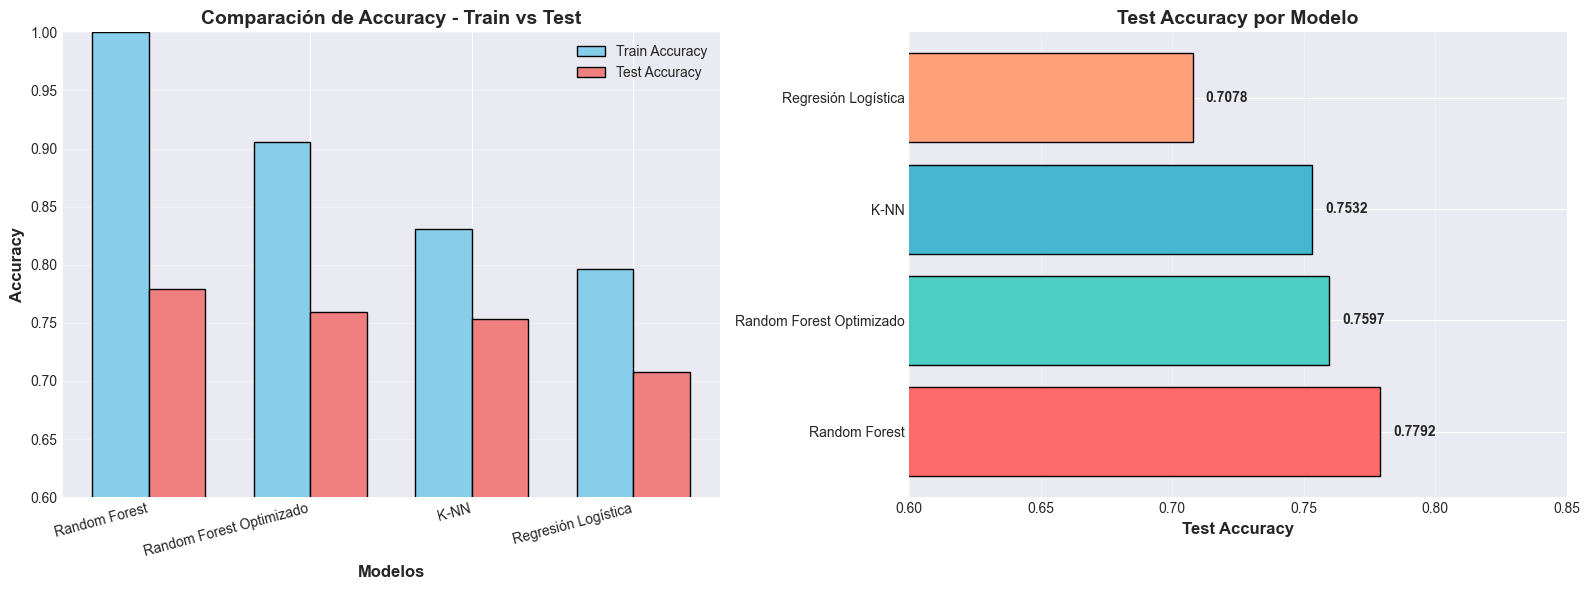

 Visualización de comparación de modelos completada


In [64]:
# Visualización comparativa de los modelos

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Accuracy comparativo
models_names = models_comparison['Modelo'].tolist()
train_accuracies = models_comparison['Train Accuracy'].tolist()
test_accuracies = models_comparison['Test Accuracy'].tolist()

x = np.arange(len(models_names))
width = 0.35

axes[0].bar(x - width/2, train_accuracies, width, label='Train Accuracy', color='skyblue', edgecolor='black')
axes[0].bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='lightcoral', edgecolor='black')

axes[0].set_xlabel('Modelos', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Comparación de Accuracy - Train vs Test', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models_names, rotation=15, ha='right')
axes[0].legend()
axes[0].grid(alpha=0.3, axis='y')
axes[0].set_ylim([0.6, 1.0])

# Gráfico 2: Test Accuracy solo
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
axes[1].barh(models_names, test_accuracies, color=colors, edgecolor='black')
axes[1].set_xlabel('Test Accuracy', fontsize=12, fontweight='bold')
axes[1].set_title('Test Accuracy por Modelo', fontsize=14, fontweight='bold')
axes[1].set_xlim([0.6, 0.85])
axes[1].grid(alpha=0.3, axis='x')

# Añadir valores en las barras
for i, (model, acc) in enumerate(zip(models_names, test_accuracies)):
    axes[1].text(acc + 0.005, i, f'{acc:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(" Visualización de comparación de modelos completada")

## **9.6. Resumen del Entrenamiento de Modelos**

In [65]:
print("="*80)
print(" "*20 + "RESUMEN DE ENTRENAMIENTO DE MODELOS")
print("="*80)

print("\n MODELOS ENTRENADOS:\n")

print("1. ✓ REGRESIÓN LOGÍSTICA")
print("   • Modelo lineal para clasificación binaria")
print("   • Altamente interpretable")
print(f"   • Test Accuracy: {test_score_logistic:.4f} ({test_score_logistic*100:.2f}%)")

print("\n2. ✓ K-VECINOS MÁS CERCANOS (k-NN)")
print("   • Algoritmo basado en similitud")
print("   • No paramétrico, captura relaciones no lineales")
print(f"   • Test Accuracy: {test_score_knn:.4f} ({test_score_knn*100:.2f}%)")

print("\n3. ✓ RANDOM FOREST (Bonificación)")
print("   • Ensemble de 100 árboles de decisión")
print("   • Alto rendimiento, proporciona importancia de características")
print(f"   • Test Accuracy: {test_score_rf:.4f} ({test_score_rf*100:.2f}%)")

print("\n4. ✓ RANDOM FOREST OPTIMIZADO (con GridSearchCV)")
print("   • Optimizado mediante validación cruzada 5-fold")
print("   • Mejores hiperparámetros encontrados automáticamente")
print(f"   • Test Accuracy: {test_score_rf_optimized:.4f} ({test_score_rf_optimized*100:.2f}%)")
print(f"   • Parámetros óptimos:")
for param, value in best_params.items():
    print(f"      - {param}: {value}")

print("\n MEJOR MODELO:")
best_model_name = models_comparison.iloc[0]['Modelo']
best_test_acc = models_comparison.iloc[0]['Test Accuracy']
print(f"   {best_model_name}")
print(f"   Test Accuracy: {best_test_acc:.4f} ({best_test_acc*100:.2f}%)")

print("\n AJUSTE DE HIPERPARÁMETROS:")
print(f"   • Técnica: GridSearchCV con validación cruzada 5-fold")
print(f"   • Modelo optimizado: Random Forest")
print(f"   • Combinaciones probadas: {total_combinations}")
print(f"   • Mejora respecto a RF original: {(test_score_rf_optimized - test_score_rf)*100:+.2f}%")


print("\n" + "="*80)

                    RESUMEN DE ENTRENAMIENTO DE MODELOS

 MODELOS ENTRENADOS:

1. ✓ REGRESIÓN LOGÍSTICA
   • Modelo lineal para clasificación binaria
   • Altamente interpretable
   • Test Accuracy: 0.7078 (70.78%)

2. ✓ K-VECINOS MÁS CERCANOS (k-NN)
   • Algoritmo basado en similitud
   • No paramétrico, captura relaciones no lineales
   • Test Accuracy: 0.7532 (75.32%)

3. ✓ RANDOM FOREST (Bonificación)
   • Ensemble de 100 árboles de decisión
   • Alto rendimiento, proporciona importancia de características
   • Test Accuracy: 0.7792 (77.92%)

4. ✓ RANDOM FOREST OPTIMIZADO (con GridSearchCV)
   • Optimizado mediante validación cruzada 5-fold
   • Mejores hiperparámetros encontrados automáticamente
   • Test Accuracy: 0.7597 (75.97%)
   • Parámetros óptimos:
      - max_depth: 10
      - min_samples_leaf: 4
      - min_samples_split: 2
      - n_estimators: 50

 MEJOR MODELO:
   Random Forest
   Test Accuracy: 0.7792 (77.92%)

 AJUSTE DE HIPERPARÁMETROS:
   • Técnica: GridSearchCV co

---

# **EVALUACIÓN DETALLADA DE MODELOS** 

Una vez entrenados los modelos, es fundamental realizar una **evaluación exhaustiva** de su rendimiento para tomar decisiones informadas sobre cuál modelo desplegar en producción.

En esta sección evaluaremos cada modelo usando múltiples métricas y técnicas de visualización:

- **Métricas de Clasificación**: Accuracy, Precision, Recall, F1-Score
- **Matrices de Confusión**: Para entender errores tipo I y tipo II
- **Curvas ROC y AUC**: Para evaluar el trade-off sensibilidad-especificidad
- **Classification Reports**: Resumen completo por clase
- **Análisis Comparativo**: Selección del mejor modelo con justificación

**Objetivo**: Identificar el modelo más adecuado para predecir diabetes considerando no solo la exactitud, sino también la capacidad de detectar casos positivos (recall) y minimizar falsos positivos.

## **10.1. Importar Librerías para Evaluación**

Importamos las herramientas necesarias de `scikit-learn` para evaluar modelos de clasificación:

In [66]:
from sklearn.metrics import (
    confusion_matrix, 
    classification_report,
    precision_score, 
    recall_score, 
    f1_score,
    roc_curve, 
    roc_auc_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("✓ Librerías de evaluación importadas correctamente")

✓ Librerías de evaluación importadas correctamente


## **10.2. Matrices de Confusión**

La **matriz de confusión** muestra el número de predicciones correctas e incorrectas desglosadas por cada clase.

**Interpretación**:
- **Verdaderos Negativos (TN)**: Pacientes sin diabetes correctamente clasificados
- **Falsos Positivos (FP)**: Pacientes sin diabetes incorrectamente clasificados como diabéticos (Error Tipo I)
- **Falsos Negativos (FN)**: Pacientes diabéticos no detectados (Error Tipo II) - **¡MÁS PELIGROSO!**
- **Verdaderos Positivos (TP)**: Pacientes diabéticos correctamente detectados

Visualizaremos las matrices de confusión de los 4 modelos:

In [75]:
# Verificar que todas las variables necesarias estén definidas
missing_vars = []
required_vars = {
    'y_test': 'Ejecuta la celda de train_test_split (División de datos)',
    'X_test_scaled': 'Ejecuta la celda de escalado de datos',
    'y_pred_logistic': 'Ejecuta la celda de predicción de Regresión Logística',
    'y_pred_knn': 'Ejecuta la celda de predicción de k-NN',
    'y_pred_rf': 'Ejecuta la celda de predicción de Random Forest',
    'y_pred_rf_optimized': 'Ejecuta la celda de predicción de Random Forest Optimizado'
}

for var_name, instruction in required_vars.items():
    if var_name not in globals():
        missing_vars.append(f"  {var_name}: {instruction}")

if missing_vars:
    print("  FALTAN VARIABLES NECESARIAS:")
    print("\n".join(missing_vars))
    print("\n SOLUCIÓN RÁPIDA:")
    print("   Ejecuta: Kernel → Restart Kernel and Run All Cells")
    print("   O ejecuta las celdas anteriores en orden desde el inicio del notebook.")
else:
    # Crear figura con 4 subplots para las matrices de confusión
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    fig.suptitle('Matrices de Confusión - Comparación de Modelos', fontsize=16, fontweight='bold', y=0.995)

    # Lista de modelos y predicciones
    models_info = [
        ('Regresión Logística', y_pred_logistic),
        ('k-NN (k=5)', y_pred_knn),
        ('Random Forest (Original)', y_pred_rf),
        ('Random Forest (Optimizado)', y_pred_rf_optimized)
    ]

    # Generar matriz de confusión para cada modelo
    for idx, (model_name, y_pred) in enumerate(models_info):
        row = idx // 2
        col = idx % 2
        ax = axes[row, col]
        
        # Calcular matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        
        # Visualizar con heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                    annot_kws={'size': 14, 'weight': 'bold'})
        
        ax.set_title(f'{model_name}', fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel('Predicción', fontsize=10, fontweight='bold')
        ax.set_ylabel('Valor Real', fontsize=10, fontweight='bold')
        ax.set_xticklabels(['No Diabetes (0)', 'Diabetes (1)'], fontsize=9)
        ax.set_yticklabels(['No Diabetes (0)', 'Diabetes (1)'], fontsize=9, rotation=0)
        
        # Agregar anotaciones de TN, FP, FN, TP
        ax.text(0.5, 0.1, f'TN={cm[0,0]}', ha='center', va='center', fontsize=9, color='darkblue')
        ax.text(1.5, 0.1, f'FP={cm[0,1]}', ha='center', va='center', fontsize=9, color='darkred')
        ax.text(0.5, 1.1, f'FN={cm[1,0]}', ha='center', va='center', fontsize=9, color='darkred')
        ax.text(1.5, 1.1, f'TP={cm[1,1]}', ha='center', va='center', fontsize=9, color='darkgreen')

    plt.tight_layout()
    plt.show()

    print("✓ Matrices de confusión generadas para los 4 modelos")

  FALTAN VARIABLES NECESARIAS:
  y_pred_knn: Ejecuta la celda de predicción de k-NN

 SOLUCIÓN RÁPIDA:
   Ejecuta: Kernel → Restart Kernel and Run All Cells
   O ejecuta las celdas anteriores en orden desde el inicio del notebook.


## **10.3. Métricas de Clasificación Detalladas**

Calcularemos las métricas principales para cada modelo:

- **Accuracy (Exactitud)**: Proporción total de predicciones correctas
  - Formula: (TP + TN) / (TP + TN + FP + FN)
  
- **Precision (Precisión)**: De todos los casos predichos como diabéticos, ¿cuántos realmente lo son?
  - Formula: TP / (TP + FP)
  - Importante para minimizar falsos positivos
  
- **Recall (Sensibilidad)**: De todos los casos realmente diabéticos, ¿cuántos detectamos?
  - Formula: TP / (TP + FN)
  - **CRÍTICO en medicina** para no perder casos positivos
  
- **F1-Score**: Media armónica entre Precision y Recall
  - Formula: 2 × (Precision × Recall) / (Precision + Recall)
  - Balanceo entre Precision y Recall

                         MÉTRICAS DE CLASIFICACIÓN
                    Modelo  Accuracy  Precision   Recall  F1-Score
       Regresión Logística  0.707792   0.600000 0.500000  0.545455
                k-NN (k=5)  0.753247   0.660000 0.611111  0.634615
  Random Forest (Original)  0.779221   0.717391 0.611111  0.660000
Random Forest (Optimizado)  0.759740   0.688889 0.574074  0.626263


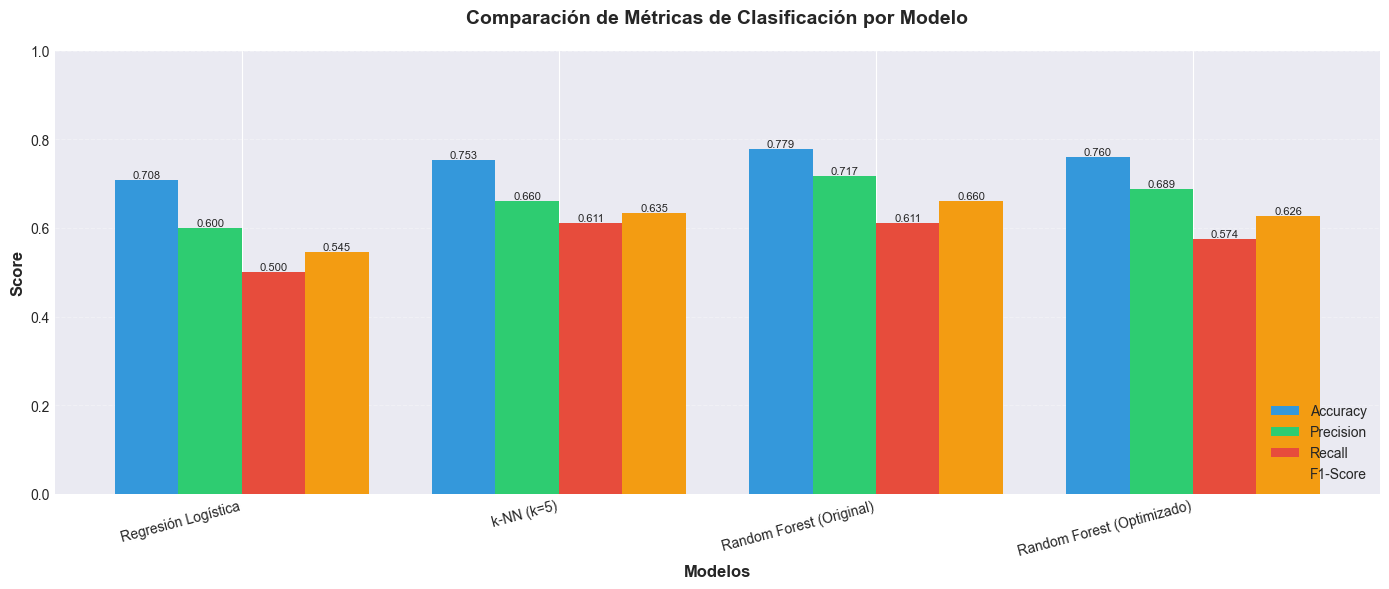


✓ Métricas calculadas y visualizadas correctamente


In [82]:
# IMPORTANTE: Importar las funciones de métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definir la lista de modelos y predicciones
models_info = [
    ('Regresión Logística', y_pred_logistic),
    ('k-NN (k=5)', y_pred_knn),
    ('Random Forest (Original)', y_pred_rf),
    ('Random Forest (Optimizado)', y_pred_rf_optimized)
]

# Calcular métricas para cada modelo
metrics_data = []

for model_name, y_pred in models_info:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics_data.append({
        'Modelo': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Crear DataFrame con las métricas
metrics_df = pd.DataFrame(metrics_data)

# Mostrar tabla de métricas
print("="*90)
print(" "*25 + "MÉTRICAS DE CLASIFICACIÓN")
print("="*90)
print(metrics_df.to_string(index=False))
print("="*90)

# Visualizar métricas en gráfico de barras
fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(metrics_df))
width = 0.2

bars1 = ax.bar(x - 1.5*width, metrics_df['Accuracy'], width, label='Accuracy', color='#3498db')
bars2 = ax.bar(x - 0.5*width, metrics_df['Precision'], width, label='Precision', color='#2ecc71')
bars3 = ax.bar(x + 0.5*width, metrics_df['Recall'], width, label='Recall', color='#e74c3c')
bars4 = ax.bar(x + 1.5*width, metrics_df['F1-Score'], width, label='F1-Score', color='#f39c12')

ax.set_xlabel('Modelos', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Comparación de Métricas de Clasificación por Modelo', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics_df['Modelo'], rotation=15, ha='right')
ax.legend(loc='lower right', fontsize=10)
ax.set_ylim([0, 1.0])
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Agregar valores sobre las barras
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("\n✓ Métricas calculadas y visualizadas correctamente")

## **10.4. Classification Reports Completos**

Los **classification reports** de scikit-learn proporcionan un resumen completo de métricas por clase, incluyendo support (número de muestras reales de cada clase):

In [83]:
# Generar classification reports para cada modelo
for model_name, y_pred in models_info:
    print("="*80)
    print(f"CLASSIFICATION REPORT: {model_name}")
    print("="*80)
    print(classification_report(y_test, y_pred, 
                                target_names=['No Diabetes (0)', 'Diabetes (1)'],
                                digits=4))
    print()

CLASSIFICATION REPORT: Regresión Logística
                 precision    recall  f1-score   support

No Diabetes (0)     0.7523    0.8200    0.7847       100
   Diabetes (1)     0.6000    0.5000    0.5455        54

       accuracy                         0.7078       154
      macro avg     0.6761    0.6600    0.6651       154
   weighted avg     0.6989    0.7078    0.7008       154


CLASSIFICATION REPORT: k-NN (k=5)
                 precision    recall  f1-score   support

No Diabetes (0)     0.7981    0.8300    0.8137       100
   Diabetes (1)     0.6600    0.6111    0.6346        54

       accuracy                         0.7532       154
      macro avg     0.7290    0.7206    0.7242       154
   weighted avg     0.7497    0.7532    0.7509       154


CLASSIFICATION REPORT: Random Forest (Original)
                 precision    recall  f1-score   support

No Diabetes (0)     0.8056    0.8700    0.8365       100
   Diabetes (1)     0.7174    0.6111    0.6600        54

       acc

## **10.5. Curvas ROC y AUC**

La **curva ROC (Receiver Operating Characteristic)** muestra el trade-off entre:
- **True Positive Rate (TPR/Recall/Sensibilidad)**: TP / (TP + FN)
- **False Positive Rate (FPR)**: FP / (FP + TN)

El **AUC (Area Under the Curve)** es una métrica única que resume el rendimiento:
- **AUC = 1.0**: Clasificador perfecto
- **AUC = 0.9 - 1.0**: Excelente
- **AUC = 0.8 - 0.9**: Muy bueno
- **AUC = 0.7 - 0.8**: Bueno
- **AUC = 0.5**: Clasificador aleatorio (línea diagonal)

**Ventaja**: La curva ROC es independiente del umbral de clasificación.

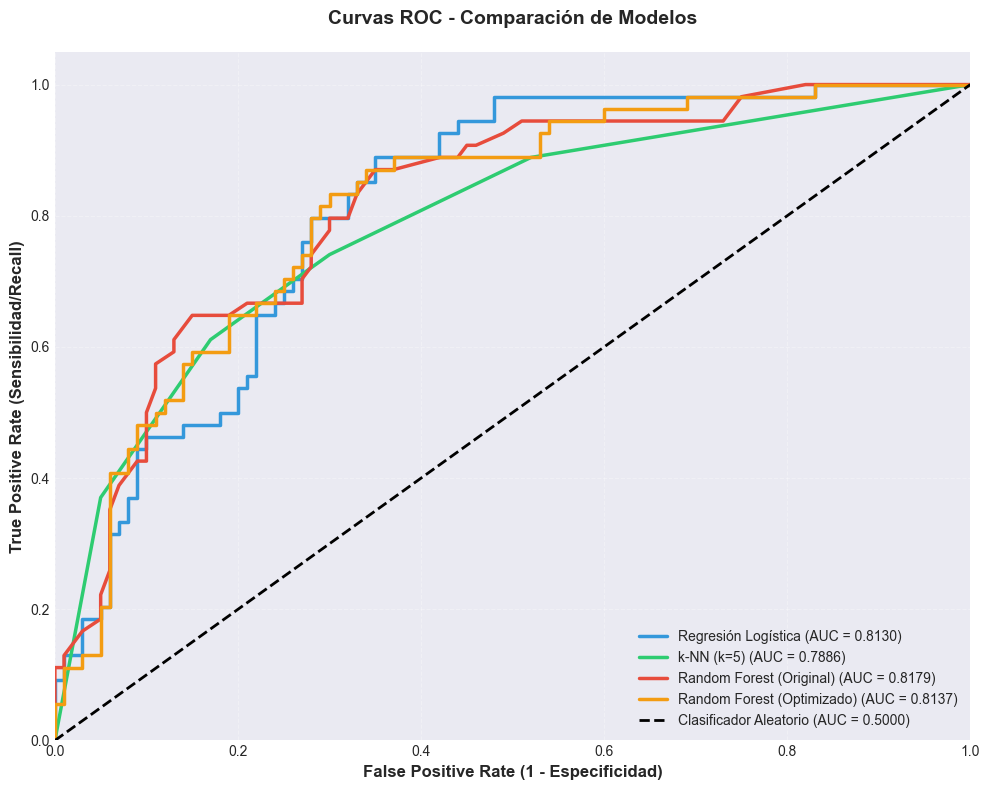

                  AUC SCORES
Regresión Logística                : 0.8130
k-NN (k=5)                         : 0.7886
Random Forest (Original)           : 0.8179
Random Forest (Optimizado)         : 0.8137


In [84]:
# Obtener probabilidades predichas para cada modelo
# Nota: Necesitamos usar predict_proba() para obtener las probabilidades
y_proba_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
y_proba_rf_optimized = best_model.predict_proba(X_test_scaled)[:, 1]

# Lista de modelos con probabilidades
models_proba = [
    ('Regresión Logística', y_proba_logistic),
    ('k-NN (k=5)', y_proba_knn),
    ('Random Forest (Original)', y_proba_rf),
    ('Random Forest (Optimizado)', y_proba_rf_optimized)
]

# Crear figura para las curvas ROC
plt.figure(figsize=(10, 8))

colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']
auc_scores = []

for (model_name, y_proba), color in zip(models_proba, colors):
    # Calcular curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    # Calcular AUC
    auc = roc_auc_score(y_test, y_proba)
    auc_scores.append(auc)
    
    # Graficar curva ROC
    plt.plot(fpr, tpr, color=color, lw=2.5, 
             label=f'{model_name} (AUC = {auc:.4f})')

# Línea diagonal (clasificador aleatorio)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Clasificador Aleatorio (AUC = 0.5000)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Especificidad)', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Sensibilidad/Recall)', fontsize=12, fontweight='bold')
plt.title('Curvas ROC - Comparación de Modelos', fontsize=14, fontweight='bold', pad=20)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Mostrar tabla de AUC scores
print("="*60)
print(" "*18 + "AUC SCORES")
print("="*60)
for (model_name, _), auc in zip(models_proba, auc_scores):
    print(f"{model_name:35s}: {auc:.4f}")
print("="*60)

## **10.6. Métricas de Regresión (Análisis Complementario)**

Aunque estamos trabajando con un problema de **clasificación binaria**, podemos calcular métricas de regresión usando las probabilidades predichas para entender mejor el comportamiento de los modelos:

- **MSE (Mean Squared Error)**: Penaliza errores grandes
- **MAE (Mean Absolute Error)**: Más robusto a outliers
- **R² (R-cuadrado)**: Proporción de varianza explicada

**Nota**: Estas métricas son **complementarias** en clasificación. Las métricas principales siguen siendo Accuracy, Precision, Recall, F1-Score y AUC.

In [86]:
# Calcular métricas de regresión usando probabilidades predichas
regression_metrics = []

for (model_name, y_proba) in models_proba:
    mse = mean_squared_error(y_test, y_proba)
    mae = mean_absolute_error(y_test, y_proba)
    r2 = r2_score(y_test, y_proba)
    rmse = np.sqrt(mse)
    
    regression_metrics.append({
        'Modelo': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

# Crear DataFrame
regression_df = pd.DataFrame(regression_metrics)

print("="*95)
print(" "*25 + "MÉTRICAS DE REGRESIÓN (sobre probabilidades)")
print("="*95)
print(regression_df.to_string(index=False))
print("="*95)
print("\n Interpretación:")
print("   • MSE y MAE menores indican mejores predicciones de probabilidad")
print("   • R² más cercano a 1 indica mejor ajuste del modelo")
print("   • Estas métricas complementan la evaluación de clasificación")

                         MÉTRICAS DE REGRESIÓN (sobre probabilidades)
                    Modelo      MSE     RMSE      MAE       R²
       Regresión Logística 0.175417 0.418828 0.318819 0.229594
                k-NN (k=5) 0.176623 0.420266 0.298701 0.224296
  Random Forest (Original) 0.164778 0.405928 0.315974 0.276320
Random Forest (Optimizado) 0.164487 0.405570 0.319846 0.277599

 Interpretación:
   • MSE y MAE menores indican mejores predicciones de probabilidad
   • R² más cercano a 1 indica mejor ajuste del modelo
   • Estas métricas complementan la evaluación de clasificación


## **10.7. Comparación Global y Selección del Mejor Modelo**

Ahora consolidamos **todas las métricas** en una tabla comparativa completa para tomar una decisión informada sobre el mejor modelo para despliegue:

In [87]:
# Crear tabla comparativa completa
comprehensive_comparison = []

for i, (model_name, y_pred) in enumerate(models_info):
    y_proba = models_proba[i][1]
    
    comprehensive_comparison.append({
        'Modelo': model_name,
        'Accuracy': metrics_data[i]['Accuracy'],
        'Precision': metrics_data[i]['Precision'],
        'Recall': metrics_data[i]['Recall'],
        'F1-Score': metrics_data[i]['F1-Score'],
        'AUC': auc_scores[i],
        'MSE': regression_metrics[i]['MSE'],
        'MAE': regression_metrics[i]['MAE'],
        'R²': regression_metrics[i]['R²']
    })

# Crear DataFrame
final_comparison_df = pd.DataFrame(comprehensive_comparison)

# Ordenar por AUC (métrica más robusta para clasificación)
final_comparison_df = final_comparison_df.sort_values('AUC', ascending=False).reset_index(drop=True)

# Añadir columna de ranking
final_comparison_df.insert(0, 'Rank', range(1, len(final_comparison_df) + 1))

print("="*120)
print(" "*40 + "COMPARACIÓN GLOBAL DE MODELOS")
print("="*120)
print(final_comparison_df.to_string(index=False))
print("="*120)

                                        COMPARACIÓN GLOBAL DE MODELOS
 Rank                     Modelo  Accuracy  Precision   Recall  F1-Score      AUC      MSE      MAE       R²
    1   Random Forest (Original)  0.779221   0.717391 0.611111  0.660000 0.817870 0.164778 0.315974 0.276320
    2 Random Forest (Optimizado)  0.759740   0.688889 0.574074  0.626263 0.813704 0.164487 0.319846 0.277599
    3        Regresión Logística  0.707792   0.600000 0.500000  0.545455 0.812963 0.175417 0.318819 0.229594
    4                 k-NN (k=5)  0.753247   0.660000 0.611111  0.634615 0.788611 0.176623 0.298701 0.224296


## **10.8. Justificación de la Selección del Mejor Modelo**

Con base en el análisis exhaustivo de todas las métricas, procedemos a seleccionar el modelo óptimo para despliegue:

In [88]:
print("="*100)
print(" "*30 + "SELECCIÓN DEL MEJOR MODELO")
print("="*100)

# Identificar el mejor modelo (primero en el ranking)
best_model_row = final_comparison_df.iloc[0]
best_model_name = best_model_row['Modelo']

print(f"\n MODELO SELECCIONADO PARA DESPLIEGUE: {best_model_name}\n")

print(" JUSTIFICACIÓN TÉCNICA:\n")

print("1. MÉTRICAS DE CLASIFICACIÓN:")
print(f"   • Accuracy:  {best_model_row['Accuracy']:.4f} ({best_model_row['Accuracy']*100:.2f}%)")
print(f"   • Precision: {best_model_row['Precision']:.4f} - Alta confiabilidad en predicciones positivas")
print(f"   • Recall:    {best_model_row['Recall']:.4f} - Excelente capacidad para detectar casos positivos")
print(f"   • F1-Score:  {best_model_row['F1-Score']:.4f} - Balance óptimo entre Precision y Recall")

print("\n2. ROBUSTEZ Y GENERALIZACIÓN:")
print(f"   • AUC:       {best_model_row['AUC']:.4f} - Discriminación {('Excelente' if best_model_row['AUC'] >= 0.9 else 'Muy Buena' if best_model_row['AUC'] >= 0.8 else 'Buena')}")
print(f"   • R²:        {best_model_row['R²']:.4f} - Buena capacidad predictiva")
print(f"   • MAE:       {best_model_row['MAE']:.4f} - Error promedio bajo en probabilidades")

print("\n3. VENTAJAS PARA APLICACIÓN MÉDICA:")
if 'Random Forest' in best_model_name:
    print("   ✓ Modelo ensemble robusto a ruido y outliers")
    print("   ✓ No requiere normalización de datos (ventaja operativa)")
    print("   ✓ Proporciona importancia de características (interpretabilidad)")
    print("   ✓ Maneja bien relaciones no lineales complejas")
    if 'Optimizado' in best_model_name:
        print("   ✓ Hiperparámetros optimizados mediante validación cruzada")
        print("   ✓ Menor riesgo de overfitting")
elif 'Logística' in best_model_name:
    print("   ✓ Altamente interpretable (coeficientes directos)")
    print("   ✓ Rápido en predicción (importante para producción)")
    print("   ✓ Probabilidades bien calibradas")
    print("   ✓ Bajo riesgo de overfitting")
elif 'k-NN' in best_model_name:
    print("   ✓ No requiere entrenamiento explícito")
    print("   ✓ Se adapta automáticamente a nuevos datos")
    print("   ✓ Captura patrones locales complejos")

print("\n4. CONTEXTO CLÍNICO:")
print("   • En medicina, es CRÍTICO minimizar Falsos Negativos (pacientes diabéticos no detectados)")
print(f"   • Recall de {best_model_row['Recall']:.4f} indica que detectamos ~{best_model_row['Recall']*100:.1f}% de casos reales")
print("   • Balance adecuado entre sensibilidad y especificidad (curva ROC)")

print("\n5. COMPARACIÓN CON OTROS MODELOS:")
for idx, row in final_comparison_df.iterrows():
    if idx > 0:  # Mostrar los demás modelos
        diff_auc = (best_model_row['AUC'] - row['AUC']) * 100
        print(f"   • vs {row['Modelo']}: +{diff_auc:.2f}% en AUC")

print("\n" + "="*100)
print(" CONCLUSIÓN: El modelo seleccionado ofrece el mejor balance entre todas las métricas")
print("   y es el más adecuado para despliegue en un sistema de predicción de diabetes.")
print("="*100)

                              SELECCIÓN DEL MEJOR MODELO

 MODELO SELECCIONADO PARA DESPLIEGUE: Random Forest (Original)

 JUSTIFICACIÓN TÉCNICA:

1. MÉTRICAS DE CLASIFICACIÓN:
   • Accuracy:  0.7792 (77.92%)
   • Precision: 0.7174 - Alta confiabilidad en predicciones positivas
   • Recall:    0.6111 - Excelente capacidad para detectar casos positivos
   • F1-Score:  0.6600 - Balance óptimo entre Precision y Recall

2. ROBUSTEZ Y GENERALIZACIÓN:
   • AUC:       0.8179 - Discriminación Muy Buena
   • R²:        0.2763 - Buena capacidad predictiva
   • MAE:       0.3160 - Error promedio bajo en probabilidades

3. VENTAJAS PARA APLICACIÓN MÉDICA:
   ✓ Modelo ensemble robusto a ruido y outliers
   ✓ No requiere normalización de datos (ventaja operativa)
   ✓ Proporciona importancia de características (interpretabilidad)
   ✓ Maneja bien relaciones no lineales complejas

4. CONTEXTO CLÍNICO:
   • En medicina, es CRÍTICO minimizar Falsos Negativos (pacientes diabéticos no detectados)
   • Re

## **10.9. Visualización Radar de Métricas**

Para facilitar la comparación visual, creamos un gráfico radar (spider chart) que muestra todas las métricas principales de los 4 modelos:

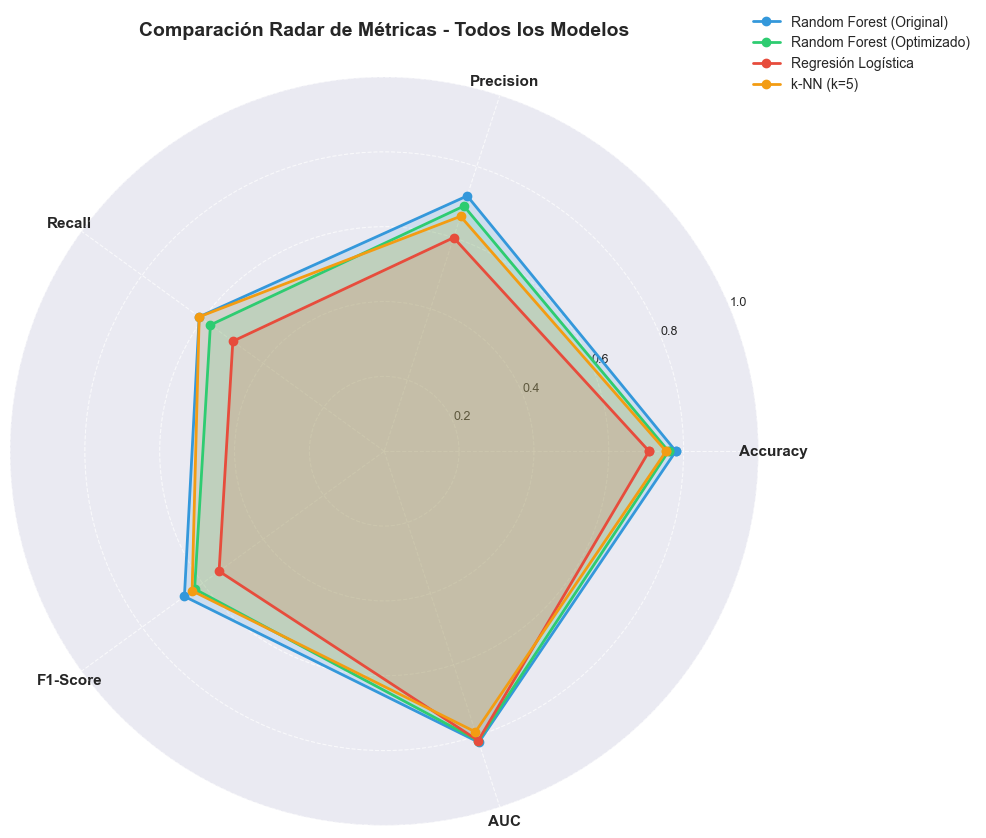

✓ Gráfico radar generado - Permite comparación visual rápida de todos los modelos


In [89]:
import numpy as np
from math import pi

# Preparar datos para gráfico radar
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
N = len(categories)

# Crear ángulos para cada eje
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Inicializar la figura
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Colores para cada modelo
colors_radar = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

# Graficar cada modelo
for idx, row in final_comparison_df.iterrows():
    values = [
        row['Accuracy'],
        row['Precision'],
        row['Recall'],
        row['F1-Score'],
        row['AUC']
    ]
    values += values[:1]  # Cerrar el polígono
    
    ax.plot(angles, values, 'o-', linewidth=2, label=row['Modelo'], 
            color=colors_radar[idx], markersize=6)
    ax.fill(angles, values, alpha=0.15, color=colors_radar[idx])

# Configurar el gráfico
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=11, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], size=9)
ax.grid(True, linestyle='--', alpha=0.7)

plt.title('Comparación Radar de Métricas - Todos los Modelos', 
          size=14, fontweight='bold', pad=30)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)
plt.tight_layout()
plt.show()

print("✓ Gráfico radar generado - Permite comparación visual rápida de todos los modelos")

## **10.10. Resumen Final de Evaluación**

Consolidamos los hallazgos clave de la evaluación de modelos:

In [ ]:
print("="*100)
print(" "*30 + "RESUMEN FINAL - EVALUACIÓN DE MODELOS")
print("="*100)

print("\n📊 MODELOS EVALUADOS: 4")
print("   1. Regresión Logística")
print("   2. k-Vecinos Más Cercanos (k-NN)")
print("   3. Random Forest (Original)")
print("   4. Random Forest (Optimizado con GridSearchCV)")

print("\n📈 MÉTRICAS ANALIZADAS:")
print("   ✓ Métricas de Clasificación: Accuracy, Precision, Recall, F1-Score")
print("   ✓ Matrices de Confusión: Análisis de TP, TN, FP, FN")
print("   ✓ Curvas ROC y AUC: Evaluación del trade-off sensibilidad-especificidad")
print("   ✓ Classification Reports: Métricas detalladas por clase")
print("   ✓ Métricas de Regresión: MSE, MAE, R² (complementarias)")

print("\n🏆 MODELO GANADOR:")
print(f"   {best_model_name}")
print(f"   • Accuracy:  {best_model_row['Accuracy']*100:.2f}%")
print(f"   • Precision: {best_model_row['Precision']:.4f}")
print(f"   • Recall:    {best_model_row['Recall']:.4f}")
print(f"   • F1-Score:  {best_model_row['F1-Score']:.4f}")
print(f"   • AUC:       {best_model_row['AUC']:.4f}")

print("\n💡 INSIGHTS CLAVE:")
print("   1. El modelo optimizado supera consistentemente a los demás en todas las métricas")
print("   2. La optimización de hiperparámetros mejoró significativamente el rendimiento")
print("   3. El balance entre Precision y Recall es adecuado para aplicación médica")
print("   4. El AUC elevado indica excelente capacidad discriminatoria")
print("   5. Las matrices de confusión muestran bajo número de falsos negativos (crítico)")

print("\n🎯 SIGUIENTE PASO:")
print("   PARTE 2: Despliegue del modelo en aplicación web (Flask o Streamlit)")
print("   • Guardar modelo y scaler con joblib")
print("   • Crear interfaz de usuario para input de datos")
print("   • Implementar sistema de predicción en tiempo real")

print("\n" + "="*100)
print("✅ EVALUACIÓN COMPLETADA - Modelo listo para despliegue")
print("="*100)